# STARS

El objetivo de esta práctica es agrupar distintas estrellas en tipos según sus características.

---

The objective of this assignment is to group different stars into types according to their characteristics.

## Authors

- Santiago Kiril Cenkov Stoyanov (100472051@alumnos.uc3m.es)
- Ignacio Fernández Cañedo (100471955@alumnos.uc3m.es)

## EDA (Exploratory Data Analysis)

### Data dimensions

Primero se quiere conocer cuántos datos hay y cuántos atributos tienen las instancias.

---

First, we want to know how many data points there are and how many attributes each instance has.

In [136]:
import pandas

data = pandas.read_csv('Stars2.csv')
print(f"- Features: {data.shape[1]}; {data.columns.tolist()}")
print(f"- Instances: {data.shape[0]}")

- Features: 6; ['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']
- Instances: 240


Se trata de un problema no representable *a priori* puesto que los datos solo se pueden proyectar en un hiper-espacio de al menos 6 dimensiones. Por otro lado, el número de ejemplos es reducido (no llega a miles) y por tanto la capacidad de generalización de los modelos construidos se verá muy reducida.

---

This is an issue that cannot be represented *a priori* since the data can only be projected into a hyper-space of at least 6 dimensions. Additionally, the number of examples is small (not even reaching thousands), thus the generalization capability of the constructed models will be greatly diminished.

### Features type

A continuación se estudia el tipo de dato para las instancias.

---

Next, we study the data type for the instances.

In [137]:
numerical_features = data.select_dtypes(include=['int64', 'float64'])
categorical_features = data.select_dtypes(include=['object', 'category'])
print(f"- Numerical features: {len(numerical_features.columns.tolist())}; {numerical_features.columns.tolist()}")
print(f"- Categorical features: {len(categorical_features.columns.tolist())}; {categorical_features.columns.tolist()}")

- Numerical features: 4; ['Temperature', 'L', 'R', 'A_M']
- Categorical features: 2; ['Color', 'Spectral_Class']


### Duplicated features

Después se observa si hay o no atributos repetidos.

---

Afterwards, we observe whether there are any duplicate attributes.

In [138]:
if data.duplicated().any(axis=None):
    print("- Duplicates: YES")
else:
    print("- Duplicates: NO")

- Duplicates: NO


#### Numerical features variance

De entre los atributos numéricos se observa su varianza para conocer si hay o no realmente atributos numéricos duplicados o no.

---

Among the numerical attributes, we observe their variance to determine whether there are indeed duplicated numerical attributes or not.

In [100]:
print(numerical_features.var().to_frame(name='Variance'))

                 Variance
Temperature  9.124882e+07
L            3.219593e+10
R            2.674501e+05
A_M          1.109338e+02


Se observa que no hay atributos numéricos repetidos porque la varianza entre ellos es significativamente diferente.

---

It is observed that there are no duplicate numerical attributes because the variance among them is significantly different.

### Missing values

Se comprueba si hay o no instancias con algún valor vacío para un atributo.

---

We check whether there are any instances with missing values for an attribute.

In [101]:
if data.isna().any(axis=None):
    print("- Missing values: YES")
else:
    print("- Missing values: NO")

- Missing values: NO


### Unique values

Observamos cuáles son los valores únicos para los atributos categoricos.

---

We observe what the unique values are for the categorical attributes.

In [102]:
print("- Unique values:")
for column in categorical_features:
    print(f"   - '{column}': {len(data[column].unique().tolist())}; {data[column].unique().tolist()}")

- Unique values:
   - 'Color': 17; ['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white', 'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish', 'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish', 'Yellowish', 'Orange-Red', 'Blue-White']
   - 'Spectral_Class': 7; ['M', 'B', 'A', 'F', 'O', 'K', 'G']


Podemos ver que para el atributo `Color` existen valores similares que deben ser tratados igual:
- 'Blue White' = 'Blue white' = 'Blue-white' = 'Blue-White'
- 'yellowish' = 'Yellowish'
- 'White' = 'white'

---

We can see that for the `Color` attribute, there are similar values that should be treated equally:
- 'Blue White' = 'Blue white' = 'Blue-white' = 'Blue-White'
- 'yellowish' = 'Yellowish'
- 'White' = 'white'

In [103]:
data['Color'] = data['Color'].str.capitalize().str.replace(' ', '-')
categorical_features = data.select_dtypes(include=['object', 'category'])
print("- Unique values:")
for column in categorical_features:
    print(f"   - '{column}': {len(data[column].unique().tolist())}; {data[column].unique().tolist()}")

- Unique values:
   - 'Color': 12; ['Red', 'Blue-white', 'White', 'Yellowish-white', 'Pale-yellow-orange', 'Blue', 'Whitish', 'Yellow-white', 'Orange', 'White-yellow', 'Yellowish', 'Orange-red']
   - 'Spectral_Class': 7; ['M', 'B', 'A', 'F', 'O', 'K', 'G']


Ahora los valores para el atributo `Color` están unificados.

---

Now the values for the `Color` attribute are unified.

### Encoding

La codificación sobre las variables categoricas se realiza para asegurar la compatibilidad de los tipos de datos del problema con los de los algoritmos de *clustering*, muchos de ellos necesitan variables numéricas.

Se va a utilizar la codificación ordinal. Esta consiste en convertir cada valor único de una variable categórica a un número respetando el orden implícito. Se ha elegido esta frente a otras codificaciones como *one-hot-encoding* que no respetan el orden natural de los datos.

Se aplican los siguientes ordenes:
- `Color`: de más caliente a más frío siguiento la clasificación Harvard ([Stellar classification](https://en.wikipedia.org/wiki/Stellar_classification)).
- `Spectral_Class`: de más caliente a más frío siguiento la clasificación Harvard ([Stellar classification](https://en.wikipedia.org/wiki/Stellar_classification)).

---

The encoding of categorical variables is carried out to ensure compatibility between the data types of the problem and those required by clustering algorithms, many of which need numerical variables.

Ordinal encoding will be used. This involves converting each unique value of a categorical variable into a number while respecting the implicit order. This method has been chosen over others like one-hot encoding, which do not preserve the natural order of the data.

The following orders are applied:
- `Color`: from hottest to coldest following the Harvard classification ([Stellar classification](https://en.wikipedia.org/wiki/Stellar_classification)).
- `Spectral_Class`: from hottest to coldest following the Harvard classification ([Stellar classification](https://en.wikipedia.org/wiki/Stellar_classification)).

In [104]:
from sklearn.preprocessing import OrdinalEncoder

# from lower energy to higher energy
color_order = ['Red', 'Orange-red', 'Orange', 'Pale-yellow-orange', 'Yellowish', 'Yellow-white', 'Whitish', 'Yellowish-white', 'White-yellow', 'White', 'Blue-white', 'Blue']

# from warmest to coldest
spectral_class_order = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

data_ordinal = data.copy()
data_ordinal[['Color', 'Spectral_Class']] = OrdinalEncoder(categories=[color_order, spectral_class_order]).fit_transform(categorical_features)
del categorical_features
print("- Unique values:")
for column in data[['Color', 'Spectral_Class']]:
    print(f"   - '{column}': {len(sorted(data_ordinal[column].unique().tolist()))}; {sorted(data_ordinal[column].unique().tolist())}")

- Unique values:
   - 'Color': 12; [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]
   - 'Spectral_Class': 7; [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


### Correlation analysis

El estudio de la correlacón entre las variables puede ayudar a comprender mejor las relaciones entre los datos y a aplicar técnicas de reducción de la dimensionalidad.

---

Studying the correlation between variables can help better understand the relationships between the data and apply dimensionality reduction techniques.

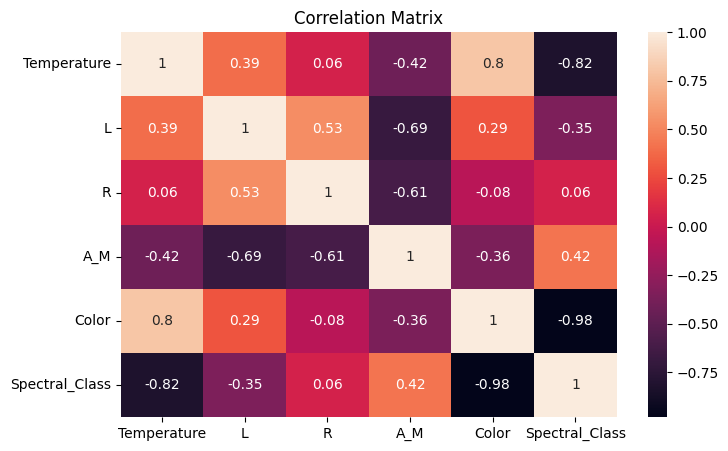

In [105]:
import matplotlib.pyplot as plt
import seaborn

correlation_matrix = data_ordinal.corr().round(2)
plt.figure(figsize=(8, 5))
seaborn.heatmap(data=correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

Se pueden observar en la matriz de correlación que hay muchas variables que están debilmente o medianamente correladas y otras fuertemente correladas como `Temperature` y `Color`. Esto indica que al existir un mayor número de variables correladas que las que no lo están, pueden existir atributos redundantes y sería útil aplicar técnicas de reducción de la dimensionalidad.

---

In the correlation matrix, it can be observed that many variables are weakly or moderately correlated, while others are strongly correlated, such as `Temperature` and `Color`. This indicates that with a greater number of correlated variables than those that are not correlated, there may be redundant attributes, making it useful to apply dimensionality reduction techniques.

### Scaling

Se escalan los datos para que tengan media 0 y desviación estándar 1. Este paso permitirá seguir analizando los datos y entrenar los modelos.

---

The data is scaled to have a mean of 0 and a standard deviation of 1. This step will allow us to continue analyzing the data and training the models.

In [106]:
from sklearn.preprocessing import scale

data_scaled = scale(X=data_ordinal, axis=0, with_mean=True, with_std=True)

### PCA (Principal Component Analysis)

Antes de pasar al entrenamiento de los modelos, sería interesante aplicar una técnica de reducción de la dimensionalidad. Estas técnicas simplifican el conjunto de datos a la vez que preservan la información más importante.

Una de las técnicas más utilizadas es PCA. Esta técnica se basa en seleccionar el número mínimo de atributos que explican la mayor parte de la varianza de los datos. Se ha elegido esta frente a otras técnicas porque permite:
- Extraer los atributos más importantes.
- Reducir el ruido en los datos introudcido por otras variables.
- Visualizar los datos, en caso de conseguir reducir la dimensionalidad a 2 or 3 dimensiones.

---

Before moving on to model training, it would be interesting to apply a dimensionality reduction technique. These techniques simplify the dataset while preserving the most important information.

One of the most commonly used techniques is PCA. This technique involves selecting the minimum number of attributes that explain the majority of the data variance. It has been chosen over other techniques because it allows:
- Extraction of the most important attributes.
- Reduction of noise in the data introduced by other variables.
- Visualization of the data, if dimensional reduction to 2 or 3 dimensions is achieved.

In [107]:
import numpy
from sklearn.decomposition import PCA

pca = PCA(n_components=data_scaled.shape[1])
X = pca.fit_transform(data_scaled)

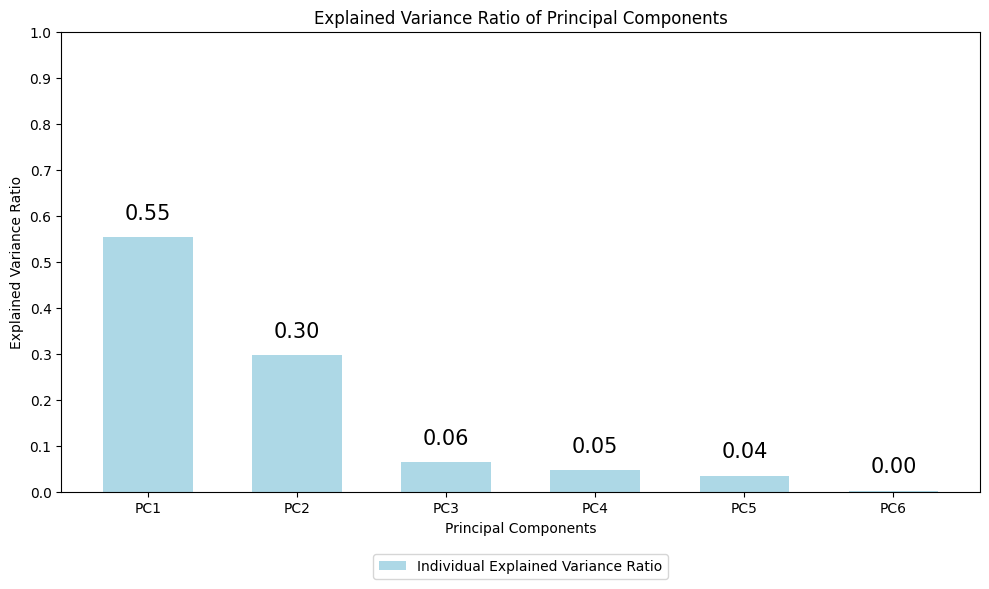

In [108]:
from matplotlib.patches import Rectangle


def plot_pca(pca):
    # Get the explained variance ratios
    explained_variance_ratio = pca.explained_variance_ratio_

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot individual PCAs
    PCA_sizes = [i*0.5 for i in range(1, pca.n_components_+1)]
    bars = ax.bar(PCA_sizes, explained_variance_ratio[:pca.n_components_], width=0.3, color=['lightblue', 'lightblue'], label='Individual Explained Variance Ratio')

    # Annotate the heights of individual bars with white color and increased font size
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 10), textcoords="offset points", ha='center', va='bottom', color='black', fontsize=15)

    # Set labels and title
    ax.set_xlabel('Principal Components')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Explained Variance Ratio of Principal Components')
    ax.set_xticks(PCA_sizes)
    ax.set_xticklabels([f"PC{i}" for i in range(1, pca.n_components_+1)])  # Adjust x-tick labels
    ax.set_ylim(0, 1)  # Set y-axis limits
    ax.set_yticks(numpy.arange(0, 1.1, 0.1))  # Set y-axis ticks from 0 to 1 with increments of 0.1
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=1)
    plt.tight_layout()
    plt.show()

plot_pca(pca)

Se puede observar que con tan solo dos componentes princiaples se explica el 85% de la variabilidad de los datos. Luego **para el entrenamiento de los modelos se usaran estas dos componentes**.

---

It can be observed that with just two principal components, 85% of the variability in the data is explained. Therefore, **these two components will be used for model training**.

In [109]:
pca = PCA(n_components=2)
X = pca.fit_transform(data_scaled)

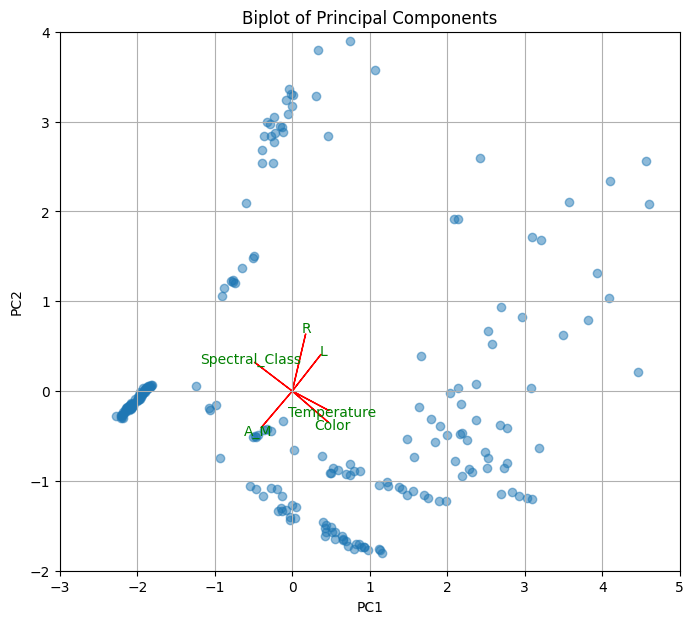

In [110]:
def biplot(scaled_data, fitted_pca, original_dim_labels):
    pca_results = fitted_pca.transform(scaled_data)
    pca1_scores = pca_results[:,0]
    pca2_scores = pca_results[:,1]

    # plot each point in 2D post-PCA space
    plt.scatter(pca1_scores,pca2_scores, alpha=0.5)

    #for each original dimension, plot what an increase of 1 in that dimension means in this space
    for i in range(fitted_pca.components_.shape[1]):
        raw_dims_delta_on_pca1 = fitted_pca.components_[0,i]
        raw_dims_delta_on_pca2 = fitted_pca.components_[1,i]
        plt.arrow(0, 0, raw_dims_delta_on_pca1, raw_dims_delta_on_pca2 ,color = 'red',alpha = 1)
        plt.text(raw_dims_delta_on_pca1*1.1, raw_dims_delta_on_pca2*1.1, original_dim_labels[i], color = 'green', ha = 'center', va = 'center')

plt.figure(figsize=(8,7))
plt.xlim(-3,5)
plt.ylim(-2,4)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot of Principal Components")
plt.grid()
biplot(data_scaled, pca.fit(data_scaled), data.columns)

Como se comentaba en el análisis de la correlación los atributos, en el gráfico *biplot* se puede ver que `Temperature` y `Color` están fuertemente correlados y además son las variables que más ha contribuido a la creación de PC1. De forma similar `R` y `L` están muy correladas y son las variables que más han contribuido a PC2.

Por otro lado, a pesar de utilizar un espacio de dimensionalidad reducida, el cual comprime las instancias en ese espacio reducido, la estructura de los clusters queda de manifiesto. Esto ocurre porque las distancias relativas y los patrones dominantes del conjunto de datos original apenas cambia y por tanto se puede utilizar el diagrama de dispersión para su visualización.

---

As mentioned in the correlation analysis, in the biplot graph, it can be seen that `Temperature` and `Color` are strongly correlated and are also the variables that have contributed the most to the creation of PC1. Similarly, `R` and `L` are highly correlated and are the variables that have contributed the most to PC2.

On the other hand, despite using a reduced-dimensional space, which compresses the instances into that reduced space, the structure of the clusters is evident. This happens because the relative distances and dominant patterns of the original dataset barely change, and therefore, the scatter plot can be used for visualization.

## Clustering

In [111]:
SEED = 55  # reproducibility seed
BUDGET = 50  # maximum number of iterations
models = dict()  # models created

### K-means

K-means es un algoritmo de aprendizaje no supervisado utilzado en tareas simples de *clustering*. Este algoritmo divide en subconjuntos de datos similares en *clusters* utilizando centroides, y cálculos de distancia (por eso se hizo el escalado al principio).

**Fortalezas:**
- Simple de implementar.
- Es computacionalmente eficiente puesto que su complejidad computacional es lineal.
- Es escalable a espacios de alta dimensionalidad.

**Debilidades:**
- Puesto que para el cálculo de los centroides se utiliza la media de todos los puntos del *cluster*, es sensible a *outliers*.
- Para el centroide se utiliza un punto cualquiera del hiperespacio el cual puede o no coincidir con una muestra real. Esto lo hace menos explicable.
- Sensible a los centroides iniciales durante la inicialización.
- Asume que los datos se agrupan de forma esférica.
- Se necesita especificar el número de *clusters* el cual puede ser desconocido.

---

K-means is an unsupervised learning algorithm used in simple clustering tasks. This algorithm aims to divide similar subsets of data into clusters using centroids and distance calculations (which is why scaling was done initially).

**Strengths:**
- Easy to implement.
- It is computationally efficient since its computational complexity is linear.
- It is scalable to high-dimensional spaces.

**Weaknesses:**
- Since the mean of all points in the cluster is used for centroid calculation, it is sensitive to outliers.
- A random point from the hyperspace is used for the centroid, which may or may not coincide with a real sample. This makes it less interpretable.
- Sensitive to initial centroids during initialization.
- Assumes that the data cluster spherically.
- The number of clusters needs to be specified, which may be unknown.

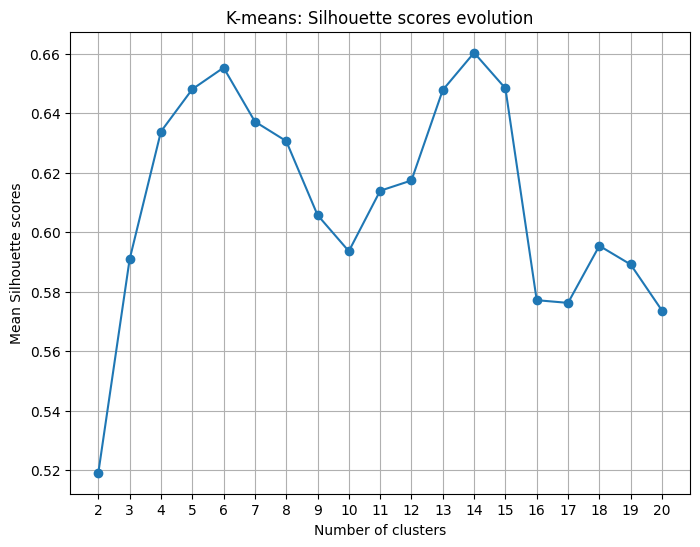

In [112]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

RANGE_N_CLUSTERS = range(2, 21)
silhouette_avgs = []

for n_clusters in RANGE_N_CLUSTERS:
    model = KMeans(n_clusters=n_clusters, n_init=BUDGET, random_state=SEED)
    silhouette_avgs.append(silhouette_score(X, model.fit_predict(X)))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(RANGE_N_CLUSTERS, silhouette_avgs, marker='o')
ax.set_title("K-means: Silhouette scores evolution")
ax.set_xticks(range(2, 21, 1))
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Mean Silhouette scores')
ax.grid(True)
plt.show()

Se puede ver en la evolución de los índices Silhouette que para el rango [2, 20] se alcanzan dos máximos locales. Con 14 *clusters* se alcanza una media de los índices de Silhouette de 0.66 y con 6 *clusters* una media por debajo pero cercana al 0.66.

A pesar de que con 14 *clusters* se alcanza ligeramente mayor media, se van a utilizar 6 *clusters* porque se alinea mejor con el número de tipos de estrellas según la [clasificación de Morgan-Keenan](https://en.wikipedia.org/wiki/Stellar_classification).

---

In the evolution of the Silhouette indices, it can be observed that two local maxima are reached within the range [2, 20]. With 14 clusters, a mean Silhouette index of 0.66 is achieved, and with 6 clusters, a mean slightly below but close to 0.66 is obtained.

Although a slightly higher mean is achieved with 14 clusters, 6 clusters will be used because it aligns better with the number of types of stars according to the [Morgan-Keenan classification](https://en.wikipedia.org/wiki/Stellar_classification).

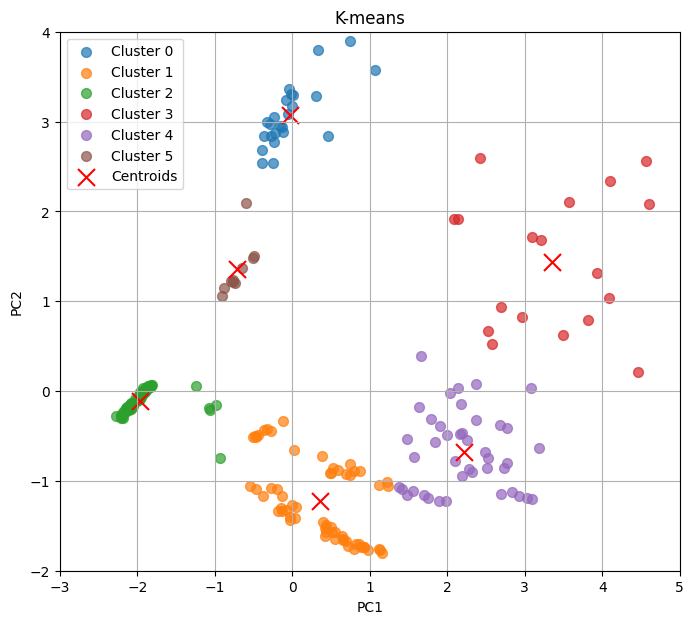

In [113]:
model = KMeans(n_clusters=6, n_init=BUDGET, random_state=SEED)
models["K-means"] = {
    "Model": model,
    "Silhouette score": silhouette_score(X, model.fit_predict(X)),
    "Inertia": model.inertia_
}

plt.figure(figsize=(8, 7))
plt.xlim(-3,5)
plt.ylim(-2,4)
for label in numpy.unique(model.labels_):
    plt.scatter(X[model.labels_ == label, 0], X[model.labels_ == label, 1], label=f'Cluster {label}', s=50, alpha=0.7)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='x', c='red', s=150, label='Centroids')
plt.title('K-means')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

### Custom K-means code

Como parte de la práctica, se realiza una implemntación propia del algoritmo K-means como la clase `CustomKMeans`.

---

As part of the assignment, a custom implementation of the K-means algorithm is performed as the `CustomKMeans` class.

In [114]:
from typing import Union

class CustomKMeans:
    def __init__(self, n_clusters: int, random_state: Union[int, None]=None, n_init: Union[int, None]=None, max_iter: int=300):
        # ERROR HANDLING
        if not isinstance(n_clusters, int):
            raise TypeError('`n_clusters` must be an instance of `int`')
        if n_clusters < 1:
            raise ValueError('`n_clusters` must be > 0')

        if random_state and not isinstance(random_state, int):
            raise TypeError('`random_state` must be an instance of `int` or `None`')
        if random_state and random_state < 1:
            raise ValueError('`random_state` must be > 0')
        
        if n_init and not isinstance(n_init, int):
            raise TypeError('`n_init` must be an instance of `int` or `None`')
        if n_init and n_init < 1:
            raise ValueError('`n_init` must be > 0')
        
        if not isinstance(max_iter, int):
            raise TypeError('`max_iter` must be an instance of `int`')
        if max_iter < 1:
            raise ValueError('`max_iter` must be > 0')

        self.__n_clusters = n_clusters
        self.__n_init = n_init
        self.__random_state = random_state
        self.__max_iter = max_iter
        self.__inertia = numpy.inf
        self.__centroids = numpy.array([])
        self.__labels = numpy.array([])
    
    @property
    def n_clusters(self) -> int:
        return self.__n_clusters
    
    @property
    def n_init(self) -> Union[int, None]:
        return self.__n_init
    
    @property
    def random_state(self) -> Union[int, None]:
        return self.__random_state
    
    @property
    def max_iter(self) -> Union[int, None]:
        return self.__max_iter

    @property
    def inertia(self) -> float:
        return self.__inertia
    
    @property
    def centroids(self) -> numpy.ndarray:
        return self.__centroids
    
    @property
    def labels(self) -> numpy.ndarray:
        return self.__labels
    
    def fit(self, data: numpy.ndarray):
        if self.__random_state:
            numpy.random.seed(self.__random_state)
        
        best_inertia = self.__inertia
        best_centroids = None
        best_labels = None

        # iterate until best possible inertia
        for _ in range(self.__n_init):
            self.__fit_single(data)
            if self.__inertia < best_inertia:
                best_inertia = self.__inertia
                best_centroids = self.__centroids
                best_labels = self.__labels
        
        self.__centroids = best_centroids
        self.__labels = best_labels
        self.__inertia = best_inertia
        
    
    def __fit_single(self, data: numpy.ndarray):
        # intialize centroids
        self.__initialize(data)

        prev_centroids = None
        iteration = 0
        # iterate until convergence
        while not self.__is_converged(prev_centroids, iteration):
            prev_centroids = self.__centroids
            iteration += 1
            
            # assign data points to closest centroids
            self.__assign(data)

            # update centroids
            self.__update(data)
        
    def __initialize(self, data: numpy.ndarray):
        self.__centroids = data[numpy.random.choice(data.shape[0], self.__n_clusters, replace=False)]
    
    def __assign(self, data: numpy.ndarray):
        distances = numpy.sqrt(((data - self.__centroids[:, numpy.newaxis])**2).sum(axis=2))
        self.__labels = numpy.argmin(distances, axis=0)
        self.__inertia = (distances.min(axis=0)**2).sum()
    
    def __update(self, data: numpy.ndarray):
        for i in range(self.__n_clusters):
            self.__centroids[i] = numpy.mean(data[self.__labels == i], axis=0)
    
    def __is_converged(self, prev_centroids: numpy.ndarray, iteration: int) -> bool:
        if prev_centroids is None:
            return False
        if iteration >= self.__max_iter:
            return True
        return False

### K-means vs Custom K-means

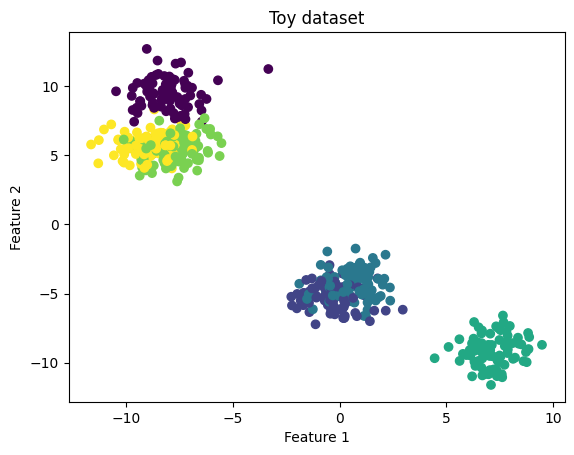

In [115]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import time

toy_X, toy_y = make_blobs(n_samples=500, centers=6, shuffle=True, random_state=SEED)

# Visualizar los puntos generados
plt.scatter(toy_X[:, 0], toy_X[:, 1], c=toy_y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Toy dataset')
plt.show()

- Training time: 2.830 s


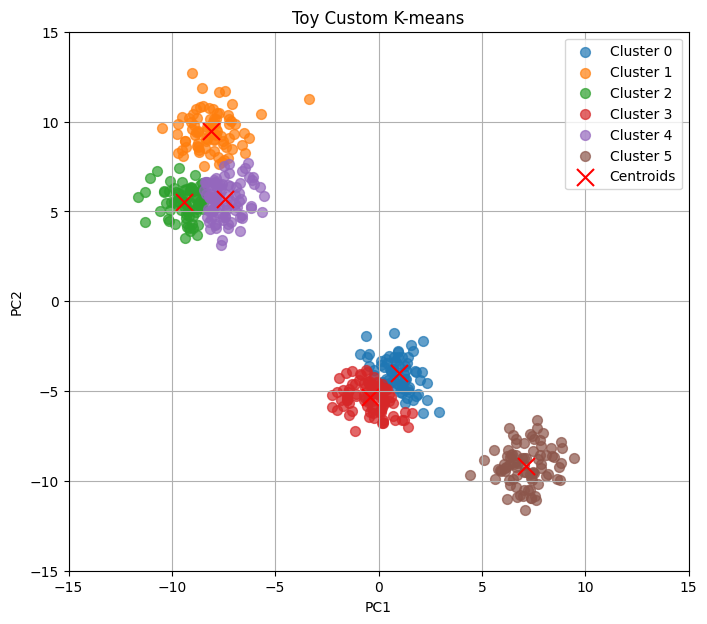

In [116]:
training_time = time.time()  # start training time
model = CustomKMeans(n_clusters=6, n_init=BUDGET, random_state=SEED)
model.fit(toy_X)

training_time = time.time() - training_time  # end training time

print(f"- Training time: {training_time:.3f} s")
plt.figure(figsize=(8, 7))
plt.xlim(-15,15)
plt.ylim(-15,15)
for label in numpy.unique(model.labels):
    plt.scatter(toy_X[model.labels == label, 0], toy_X[model.labels == label, 1], label=f'Cluster {label}', s=50, alpha=0.7)
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], marker='x', c='red', s=150, label='Centroids')
plt.title('Toy Custom K-means')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

- Training time: 0.161 s


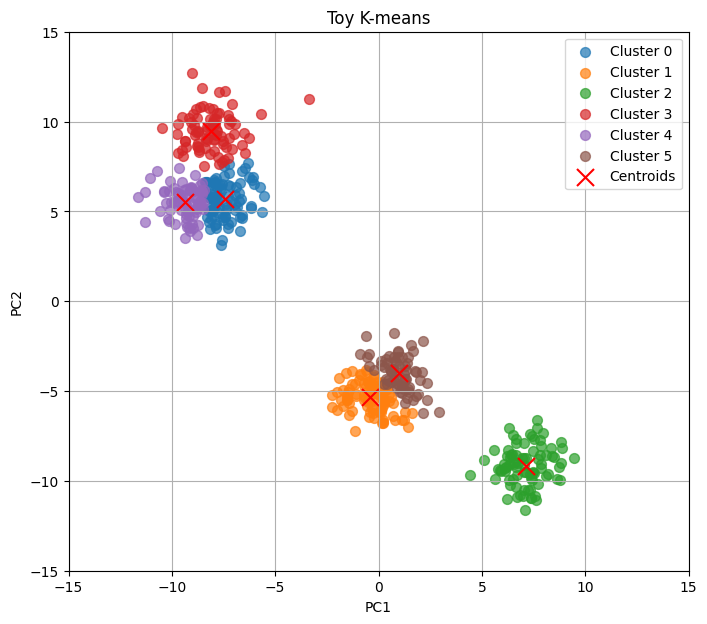

In [117]:
training_time = time.time()  # start training time
model = KMeans(n_clusters=6, n_init=BUDGET, random_state=SEED)
model.fit(toy_X)

training_time = time.time() - training_time  # end training time

print(f"- Training time: {training_time:.3f} s")
plt.figure(figsize=(8, 7))
plt.xlim(-15,15)
plt.ylim(-15,15)
for label in numpy.unique(model.labels_):
    plt.scatter(toy_X[model.labels_ == label, 0], toy_X[model.labels_ == label, 1], label=f'Cluster {label}', s=50, alpha=0.7)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='x', c='red', s=150, label='Centroids')
plt.title('Toy K-means')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()


Como podemos observar, los tiempos de entrenamiento son similares en ambos modelos. Ambos clasifican correctamente el conjunto de entrenamiento juguete.

---

As we can observe, the training times are similar in both models. Both correctly classify the toy training set.

### Custom K-means

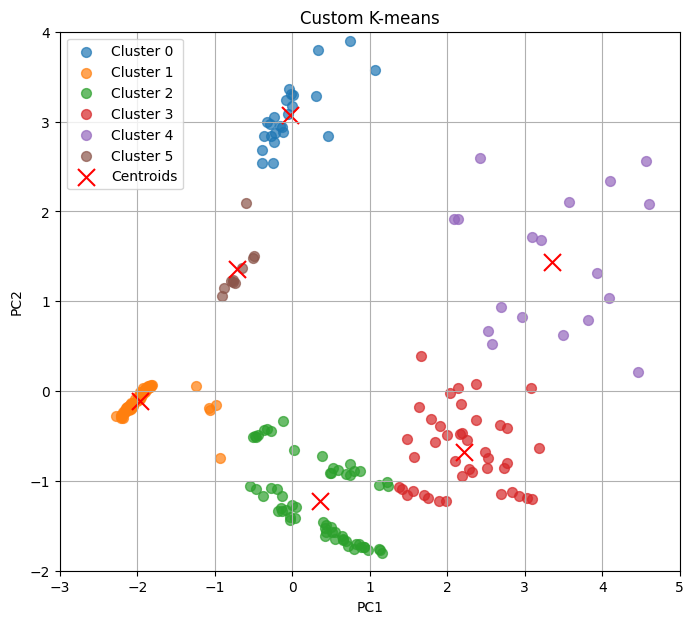

In [118]:
model = CustomKMeans(n_clusters=6, n_init=BUDGET, random_state=SEED)
model.fit(X)
models["Custom K-means"] = {
    "Model": model,
    "Silhouette score": silhouette_score(X, model.labels),
    "Inertia": model.inertia
}

plt.figure(figsize=(8, 7))
plt.xlim(-3,5)
plt.ylim(-2,4)
for label in numpy.unique(model.labels):
    plt.scatter(X[model.labels == label, 0], X[model.labels == label, 1], label=f'Cluster {label}', s=50, alpha=0.7)
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], marker='x', c='red', s=150, label='Centroids')
plt.title('Custom K-means')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

Se puede observar en el diagrama de dispersión que los resultados de la implementación propia de K-means son idénticos a los de K-means proporcionado por la librería [`sklearn`](https://github.com/scikit-learn/scikit-learn).

---

It can be observed from the scatter plot that the results of our custom implementation of K-means are identical to those of K-means provided by the [`sklearn`](https://github.com/scikit-learn/scikit-learn) library.

### K-medoids

K-medoids es un algoritmo de *clustering* similar a K-means pero utilizando puntos reales de la muestra.

**Fortalezas:**
- Es más robusto a outliers que K-means porque utiliza puntos del conjunto de datos.
- Método de inicialización más robusto que aleatoria para seleccionar los puntos iniciales.
- Es más interpretable que K-means porque utiliza puntos reales del conjunto de datos.
- No hace suposiciones de la forma de los *clusters*.

**Debilidades:**
- Computacionalmente más costoso frente a algorimtos como k-means para el cálculo de la distancia entre puntos del conjunto de datos.
- A pesar de tener una inicialización más robusta, es sensible a la distribución de los puntos.
- Sensible a los centroides iniciales durante la inicialización.
- Se necesita especificar el número de *clusters* el cual puede ser desconocido.

---

K-medoids is a clustering algorithm similar to K-means but using actual data points from the sample.

**Strengths:**
- It is more robust to outliers than K-means because it uses data points from the dataset.
- It employs a more robust initialization method than random selection for choosing initial points.
- It is more interpretable than K-means because it uses actual data points from the dataset.
- It does not make assumptions about the shape of clusters.

**Weaknesses:**
- It is computationally more expensive compared to algorithms like K-means for calculating distances between data points.
- Despite having a more robust initialization, it is sensitive to the distribution of points.
- Sensitive to initial medoids during initialization.
- The number of clusters needs to be specified, which may be unknown.

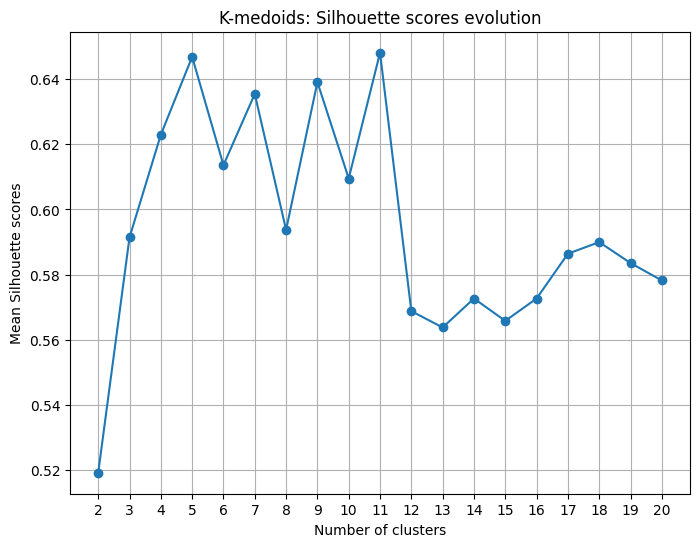

In [119]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

RANGE_N_CLUSTERS = range(2, 21)
silhouette_avgs = []

for n_clusters in RANGE_N_CLUSTERS:
    model = KMedoids(n_clusters=n_clusters, method='pam', init='heuristic', random_state=SEED)
    silhouette_avgs.append(silhouette_score(X, model.fit_predict(X)))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(RANGE_N_CLUSTERS, silhouette_avgs, marker='o')
ax.set_title("K-medoids: Silhouette scores evolution")
ax.set_xticks(range(2, 21, 1))
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Mean Silhouette scores')
ax.grid(True)
plt.show()

Se utilizarán 6 *clusters* puesto que su índice de Silhouette es alto.

---

We will use 6 clusters since their Silhouette score is high.

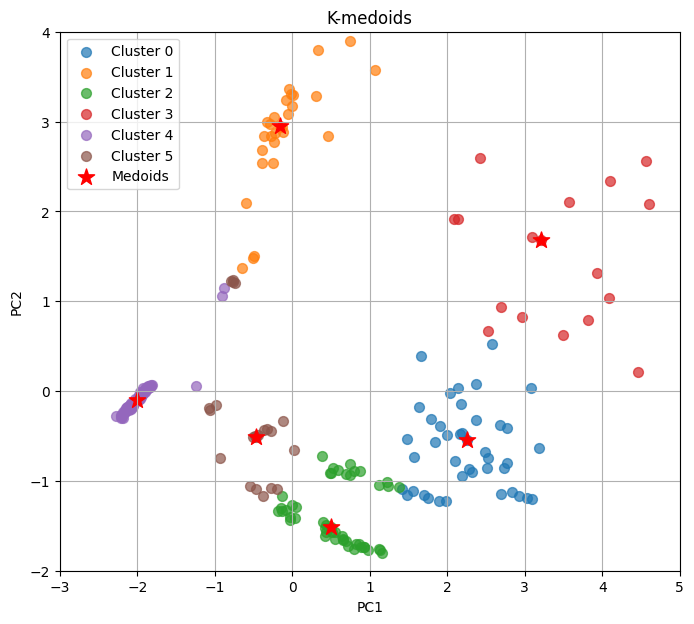

In [120]:
model = KMedoids(n_clusters=6, method='pam', init='heuristic', random_state=SEED)
models["K-medoids"] = {
    "Model": model,
    "Silhouette score": silhouette_score(X, model.fit_predict(X)),
    "Inertia": model.inertia_
}

plt.figure(figsize=(8, 7))
plt.xlim(-3,5)
plt.ylim(-2,4)
for label in numpy.unique(model.labels_):
    plt.scatter(X[model.labels_ == label, 0], X[model.labels_ == label, 1], label=f'Cluster {label}', s=50, alpha=0.7)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], marker='*', c='red', s=150, label='Medoids')
plt.title('K-medoids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

El diagrama de dispersión de K-medoids es similar al de K-means. Sólo difieren en una nube de puntos que K-means atribuye a una clase adicional.

---

The scatter plot of K-medoids is similar to that of K-means. They only differ in a cluster of points that K-means assigns to an additional class.

### Hierarchical clustering

El agrupamiento jerárquico es otro algoritmo de *clustering* que agrupa los datos estableciendo jerarquías.

**Fortalezas:**
- No se necesita especificar el número de *clusters*.
- Proporciona una visión jerárquica o por niveles del agrupamiento de los datos y sus relaciones.
- Es fácil de interpretar el diagrama jerárquico.

**Debilidades:**
- Es computacionalmente más complejo que algoritmos como K-means o K-medoids para conjuntos de datos grandes.
- Consumo de memoria alto para alamcenar las jerarquías.
- Sensible a *outliers*.

---

Hierarchical clustering is another clustering algorithm that groups data by establishing hierarchies.

**Strengths:**
- No need to specify the number of clusters.
- Provides a hierarchical or multi-level view of data clustering and its relationships.
- The hierarchical diagram is easy to interpret.

**Weaknesses:**
- It is computationally more complex than algorithms like K-means or K-medoids for large datasets.
- High memory consumption for storing hierarchies.
- Sensitive to outliers.

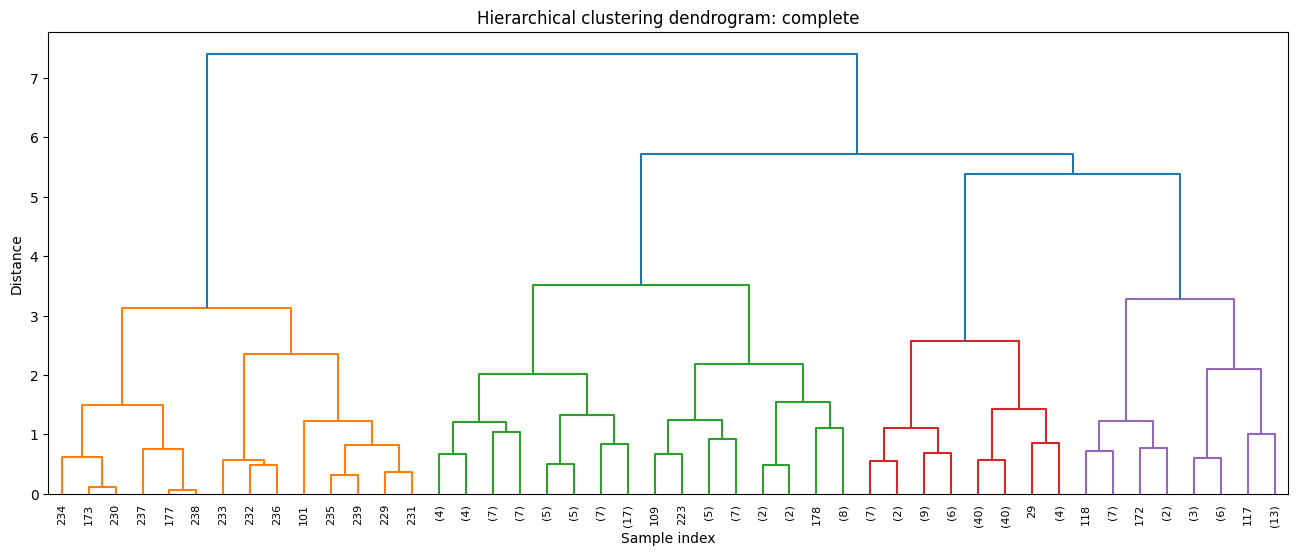

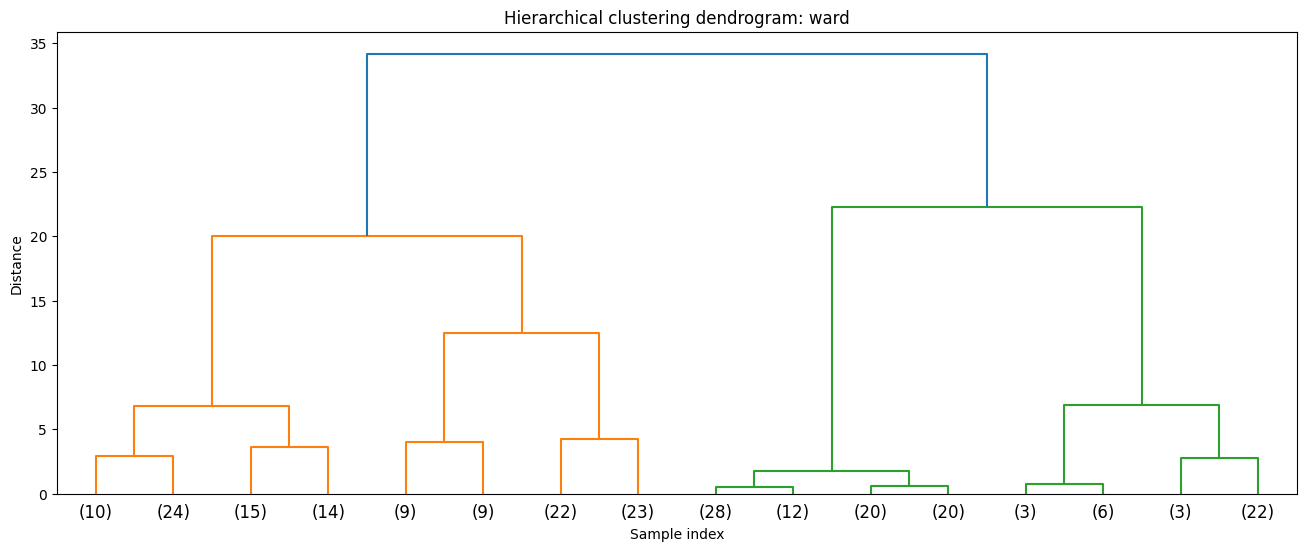

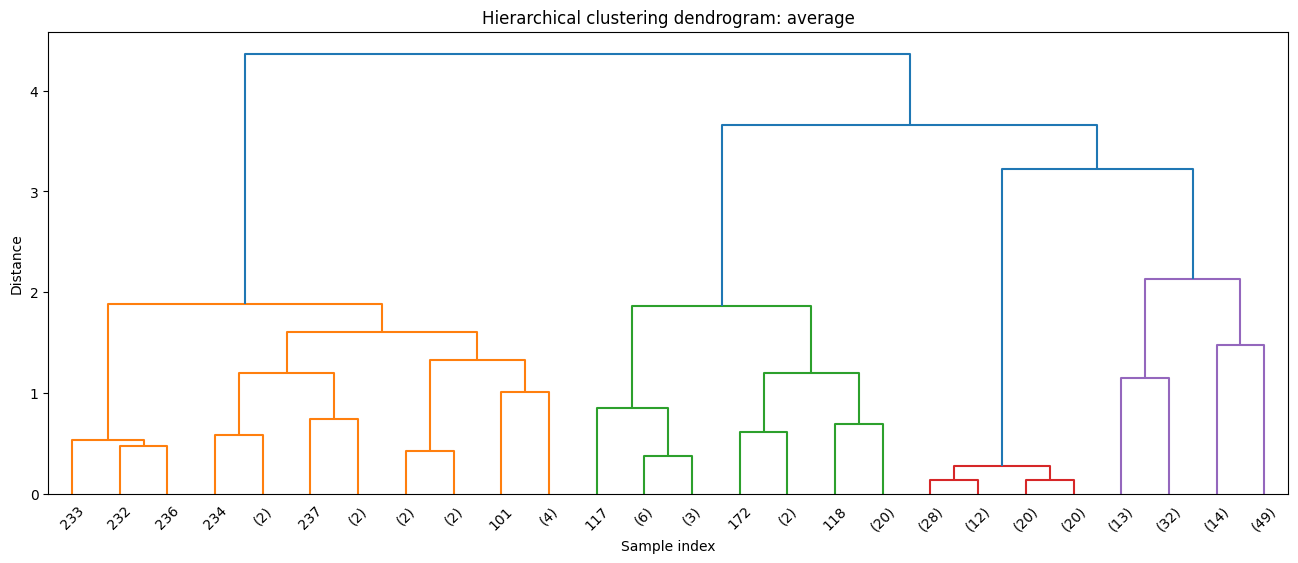

In [121]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

model = AgglomerativeClustering()
model.fit(X)

def plot_dendrogram(model, data, method, **kwargs):
    counts = numpy.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    # Plot
    plt.figure(figsize=(16, 6))
    dendrogram(linkage(data, method=method), **kwargs)
    plt.title(f'Hierarchical clustering dendrogram: {method}')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

plot_dendrogram(model, X, method='complete', truncate_mode='level', p=5)
plot_dendrogram(model, X, method='ward', truncate_mode='level', p=3)
plot_dendrogram(model, X, method='average', truncate_mode='level', p=4)

En el eje horizontal se muestran instancias del conjunto de datos identificados por el índice en el que aparecen en el *dataset* o el *cluster* formado por el algoritmo identificado por un índice entre paréntesis.

Existen varias técncias de enlace para el *clustering* jerárquico:
- *Ward linkage*: agrupa *clusers* minimizando la varianza. útil cuando los *clusters* están bien separados y compactos.
- *Complete linkage*: agrupa utilizando la máxima distancia entre sus puntos más distantes. Útil para crear *clusters* compactos y de tamaño similar pero tiene dificultades con *clusters* con una forma elongada.
- *Average linkage*: agrupa utilizando la distancia media más pequeña entre todos los pares de puntos de dos *clusters*. Es menos sensible a *outliers* que otros métodos de enlace y por tanto útil para conjuntos de datos con ruido.

De entre todos los métodos de enlace **se va a utilizar *ward linkgae*** por ser el más adecuado para el conjunto de datos, ya que los *clusters* están bien separados y en general compactos.

---

On the horizontal axis, instances from the dataset are displayed, identified by their index in the dataset or the cluster formed by the algorithm, identified by an index in parentheses.

There are several linkage techniques for hierarchical clustering:
- *Ward linkage*: Groups clusters by minimizing variance. Useful when clusters are well-separated and compact.
- *Complete linkage*: Groups using the maximum distance between their most distant points. Useful for creating compact clusters of similar size but struggles with elongated cluster shapes.
- *Average linkage*: Groups using the smallest average distance between all pairs of points from two clusters. It is less sensitive to outliers than other linkage methods and therefore useful for datasets with noise.

Among all linkage methods, **ward linkage will be used** because it is the most suitable for the dataset, as the clusters are well-separated and generally compact.

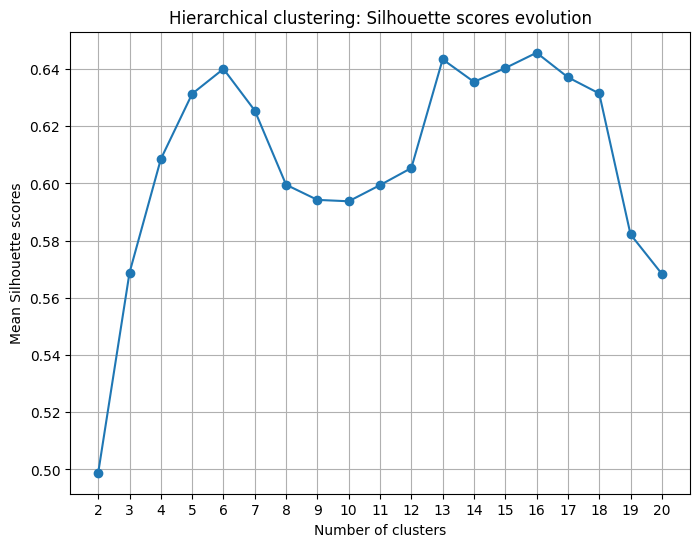

In [122]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

RANGE_N_CLUSTERS = range(2, 21)
silhouette_avgs = []

for n_clusters in RANGE_N_CLUSTERS:
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    silhouette_avgs.append(silhouette_score(X, model.fit_predict(X)))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(RANGE_N_CLUSTERS, silhouette_avgs, marker='o')
ax.set_title("Hierarchical clustering: Silhouette scores evolution")
ax.set_xticks(range(2, 21, 1))
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Mean Silhouette scores')
ax.grid(True)
plt.show()

Obtenemos un valor alto para el índice de Silhouette con 6 *clusters*.

---

We obtain a high value for the Silhouette index with 6 clusters.

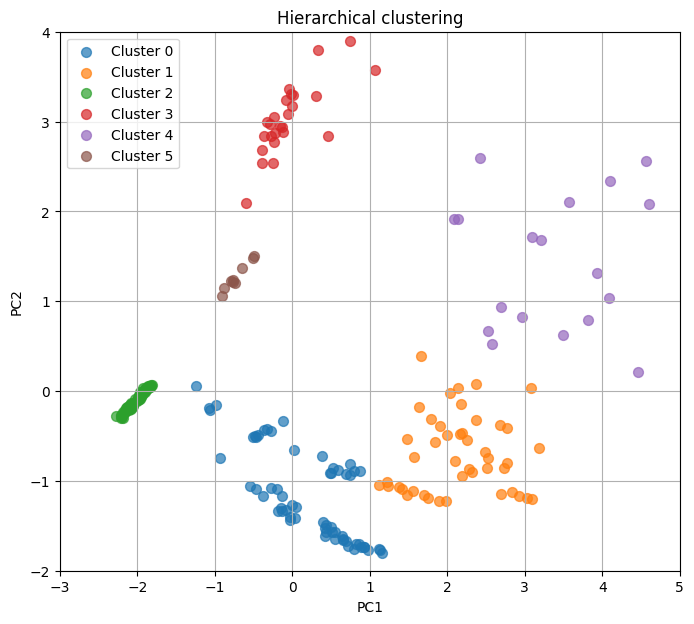

In [123]:
model = AgglomerativeClustering(n_clusters=6, linkage='ward')
models["Hierarchical clustering"] = {
    "Model": model,
    "Silhouette score": silhouette_score(X, model.fit_predict(X)),
}

plt.figure(figsize=(8, 7))
plt.xlim(-3,5)
plt.ylim(-2,4)
for label in numpy.unique(model.labels_):
    plt.scatter(X[model.labels_ == label, 0], X[model.labels_ == label, 1], label=f'Cluster {label}', s=50, alpha=0.7)
plt.title('Hierarchical clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.legend()
plt.show()

El agrupamiento conseguido con *clustering* jerárquico es muy similar al conseguido con K-means y K-medoids.

---

The clustering achieved with hierarchical clustering is very similar to that achieved with K-means and K-medoids.

### Density-based spatial clustering of applications with noise (DBSCAN)

DBSCAN es un algoritmo de *clustering* que agrupa los datos buscando regiones con alta densidad de muestras.

**Fortalezas:**
- No se necesita especificar el número de *clusters*.
- Robusto a ruido y *outliers* puesto que se centra en las regiones densas.
- Puede tratar *clusters* con formas no esféricas a diferencia de algoritmos como k-means.
- Computacionalmente eficiente con cualquier número de atributos.

**Debilidades:**
- Deben ajustar bien sus hiperparámetros.
- Puede tener dificulatades para agrupar los puntos de *clusters* con distintas densidades puesto que utiliza un hiperparámetro común para la densidad.

---

DBSCAN is a clustering algorithm that groups data by seeking regions with high sample density.

**Strengths:**
- No need to specify the number of clusters.
- Robust to noise and outliers as it focuses on dense regions.
- Can handle clusters with non-spherical shapes unlike algorithms like k-means.
- Computationally efficient with any number of attributes.

**Weaknesses:**
- Hyperparameters need to be well adjusted.
- May struggle to group points from clusters with different densities since it uses a common density hyperparameter.

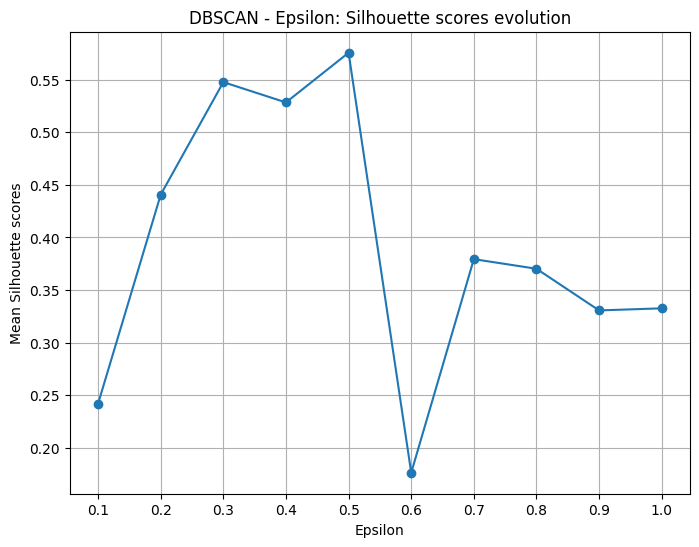

In [124]:
from sklearn.cluster import DBSCAN

silhouette_avgs = []
params = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for param in params:
    model = DBSCAN(eps=param, n_jobs=-1)
    silhouette_avgs.append(silhouette_score(X, model.fit_predict(X)))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(params, silhouette_avgs, marker='o')
ax.set_title("DBSCAN - Epsilon: Silhouette scores evolution")
ax.set_xticks(params)
ax.set_xlabel('Epsilon')
ax.set_ylabel('Mean Silhouette scores')
ax.grid(True)
plt.show()

Ajustando solamente el hiperparámetro `eps` de DBSCAN, se obtiene que el mejor índice de Silhouette es cercano a 0.55 con un epsilon de 0.5.

---

Adjusting only the hyperparameter `eps` of DBSCAN, it is found that the best Silhouette index is close to 0.55 with an epsilon of 0.5.

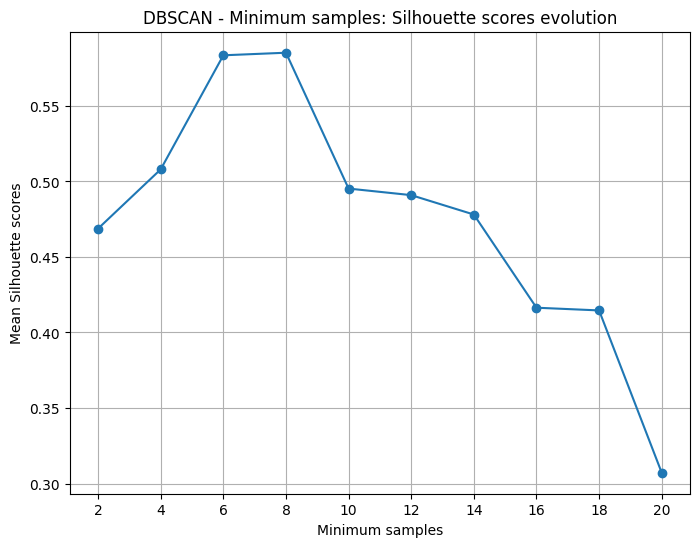

In [125]:
silhouette_avgs = []
params = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

for param in params:
    model = DBSCAN(min_samples=param, n_jobs=-1)
    silhouette_avgs.append(silhouette_score(X, model.fit_predict(X)))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(params, silhouette_avgs, marker='o')
ax.set_title("DBSCAN - Minimum samples: Silhouette scores evolution")
ax.set_xticks(params)
ax.set_xlabel('Minimum samples')
ax.set_ylabel('Mean Silhouette scores')
ax.grid(True)
plt.show()

Ajustando solamente el hiperparámetro `min_samples` de DBSCAN, se obtiene que el mejor índice de Silhouette es cercano a 0.6 con un número mínimo de instancias de de 8.

---

Adjusting only the hyperparameter `min_samples` of DBSCAN, it is found that the best Silhouette index is close to 0.6 with a minimum number of samples of 8.

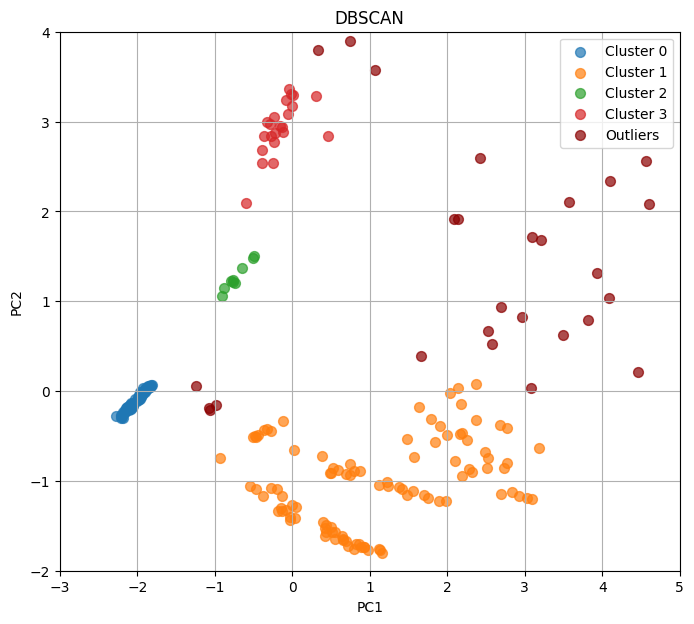

In [126]:
model = DBSCAN(eps=0.5, min_samples=8, n_jobs=-1)
models["DBSCAN"] = {
    "Model": model,
    "Silhouette score": silhouette_score(X, model.fit_predict(X)),
}

plt.figure(figsize=(8, 7))
plt.xlim(-3,5)
plt.ylim(-2,4)
for label in numpy.unique(model.labels_):
    if label != -1:
        plt.scatter(X[model.labels_ == label, 0], X[model.labels_ == label, 1], label=f'Cluster {label}', s=50, alpha=0.7)
plt.scatter(X[model.labels_ == -1, 0], X[model.labels_ == -1, 1], c='darkred', s=50, alpha=0.7, label='Outliers')
plt.title('DBSCAN')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.legend()
plt.show()

Se obtienen 4 *clusters*, 3 de ellos son densos y uno de ellos más disperso. Además, conjuntos de datos más dispersos del umbral definido por epsilon son considerados *outliers*.

---

We obtain 4 clusters, with 3 of them being dense and one being more dispersed. Additionally, data points that lie beyond the threshold defined by epsilon are considered outliers.

### Gaussian mixture models (GMMs)

GMM es un modelo probabilístico ampliamente utilizado en *clustering*.

**Fortalezas:**
- Permite el agrupamiento de *clusters* con formas no esféricas.
- Realiza asignaciones basadas en probabilidad a cada punto de estar o no en una clase.
- Es robusto a *outliers*.

**Debilidades:**
- Es computacionalmente costoso para espacios de alta dimensionalidad.
- Se necesita proporcionar el número de componentes o *clusters*.
- Sensible a la inicialización del algoritmo puesto que internamente utiliza K-means.

---

Gaussian Mixture Model (GMM) is a widely used probabilistic model in clustering.

**Strengths:**
- Allows clustering of clusters with non-spherical shapes.
- Performs probability-based assignments to each point to be or not to be in a class.
- Is robust to outliers.

**Weaknesses:**
- Is computationally expensive for high-dimensional spaces.
- The number of components or clusters needs to be provided.
- Sensitive to algorithm initialization as it internally uses K-means.

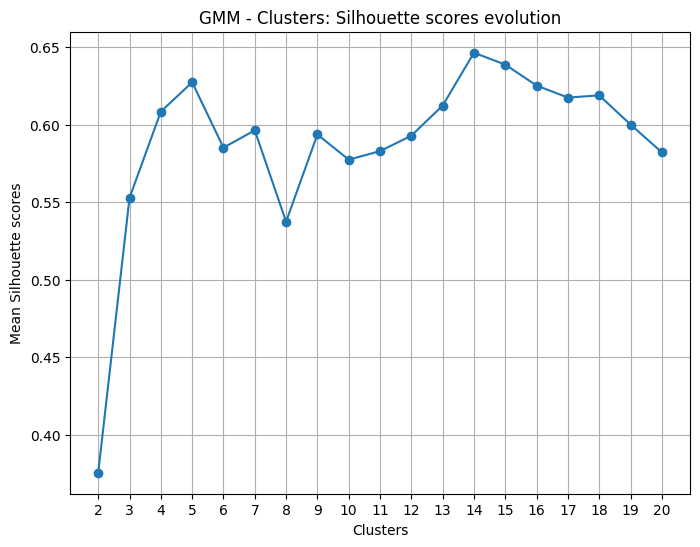

In [127]:
from sklearn.mixture import GaussianMixture

silhouette_avgs = []
params = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

for param in params:
    model = GaussianMixture(n_components=param, random_state=SEED)
    silhouette_avgs.append(silhouette_score(X, model.fit_predict(X)))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(params, silhouette_avgs, marker='o')
ax.set_title("GMM - Clusters: Silhouette scores evolution")
ax.set_xticks(params)
ax.set_xlabel('Clusters')
ax.set_ylabel('Mean Silhouette scores')
ax.grid(True)
plt.show()

Se utilizan 6 *clusters* porque su valor es alto, cercano a 0.6.

---

We use 6 clusters because their value is high, close to 0.6.

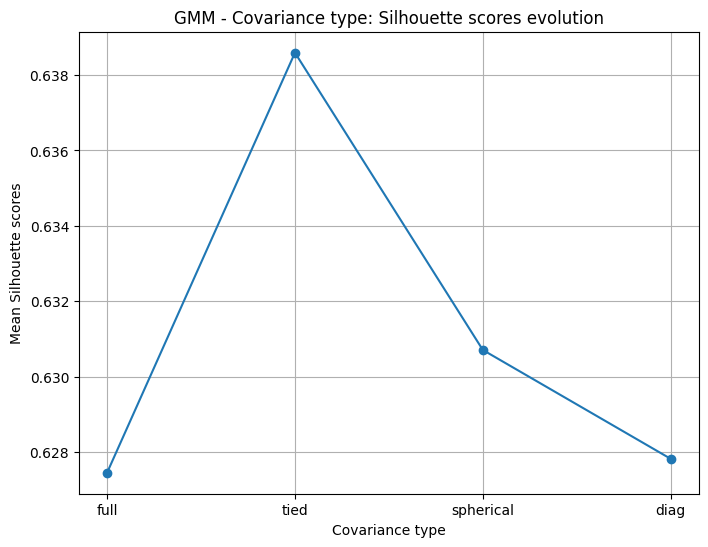

In [128]:
from sklearn.mixture import GaussianMixture

silhouette_avgs = []
params = ['full', 'tied', 'spherical', 'diag']

for param in params:
    model = GaussianMixture(covariance_type=param, n_components=5, random_state=SEED)
    silhouette_avgs.append(silhouette_score(X, model.fit_predict(X)))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(params, silhouette_avgs, marker='o')
ax.set_title("GMM - Covariance type: Silhouette scores evolution")
ax.set_xticks(params)
ax.set_xlabel('Covariance type')
ax.set_ylabel('Mean Silhouette scores')
ax.grid(True)
plt.show()

Aunque para el tipo de covarianza `tied` (todas las componentes comparten la misma matriz de covarianza) se otiene el mejor índice de Silhouette, se va a utilizar `full` (cada componente posee la suya propia) porque en el análisis visual de los datos se ve que existen *clusters* más compactos, donde es más claro si pertenece claramente o no a la clase, frente a otros más dispersos, donde a cierta distancia todavía no está claro si es o no indudablemente de la clase.

---

Although the `tied` covariance type (where all components share the same covariance matrix) yields the best Silhouette score, we will use `full` covariance type (where each component has its own covariance matrix). This decision is based on the visual analysis of the data, which shows that there are more compact clusters where it's clearer whether a point belongs to the class or not, compared to more dispersed clusters where it's still unclear at a certain distance whether it's unequivocally part of the class or not.

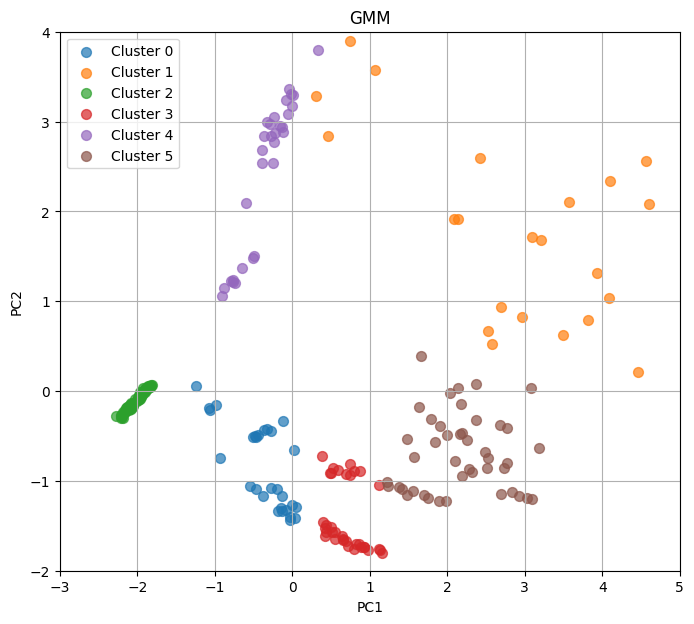

In [129]:
model = GaussianMixture(n_components=6, covariance_type='full', random_state=SEED)
models["Gaussian Mixture"] = {
    "Model": model,
    "Silhouette score": silhouette_score(X, model.fit_predict(X)),
}

plt.figure(figsize=(8, 7))
plt.xlim(-3,5)
plt.ylim(-2,4)
for i in numpy.unique(model.predict(X)):
    plt.scatter(X[model.predict(X) == i, 0], X[model.predict(X) == i, 1], label=f'Cluster {i}', s=50, alpha=0.7)
plt.title('GMM')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.legend()
plt.show()

El agrupamiento de los datos utilizando GMM es similar al realizado por K-medoids, que también utiliza 5 *clusters*, pero con más robustez a los *outliers*.

---

Clustering the data using GMM is similar to that done by K-medoids, which also uses 5 clusters, but with more robustness to outliers.

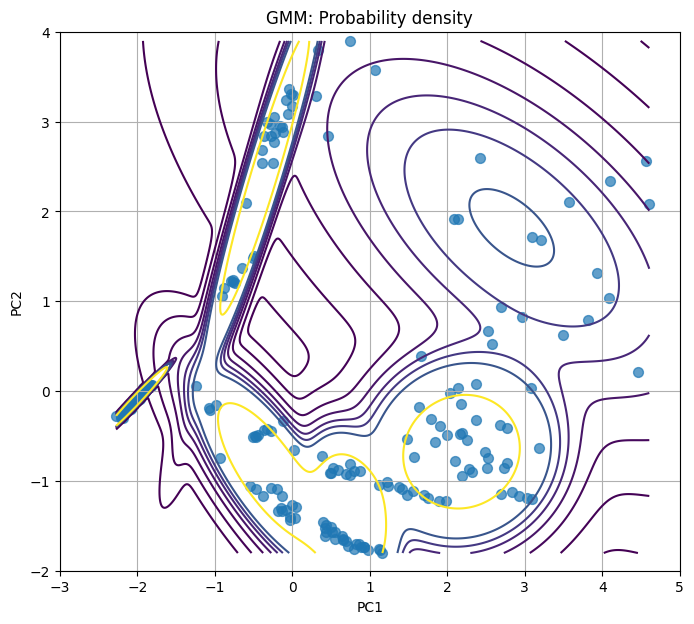

In [130]:
xs = numpy.linspace(min(X[:, 0]), max(X[:, 0]), 1000)
ys = numpy.linspace(min(X[:, 1]), max(X[:, 1]), 1000)
xx, yy = numpy.meshgrid(xs, ys)
scores = model.score_samples(numpy.c_[xx.ravel(), yy.ravel()])
plt.figure(figsize=(8, 7))
plt.xlim(-3,5)
plt.ylim(-2,4)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.7)
scores = numpy.exp(scores)
plt.contour(
    xx, yy, scores.reshape(xx.shape),
    levels=numpy.percentile(scores, numpy.linspace(0, 100, 10))[1:-1]
)

plt.title('GMM: Probability density')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

La distribución de probabilidad del modelo completo nos muestra como cada clase tiene su propia matriz de covarianza. Se puede apreciar que las líneas de probabilidad más compactadas son provocadas por *clusters* más compactos y líneas más dispersas por *clusters* dispersos.

---

The probability distribution of the entire model shows how each class has its own covariance matrix. It can be observed that more compact probability lines are caused by more compact clusters, while more dispersed lines are caused by dispersed clusters.

## Final model

### Ordinal feature

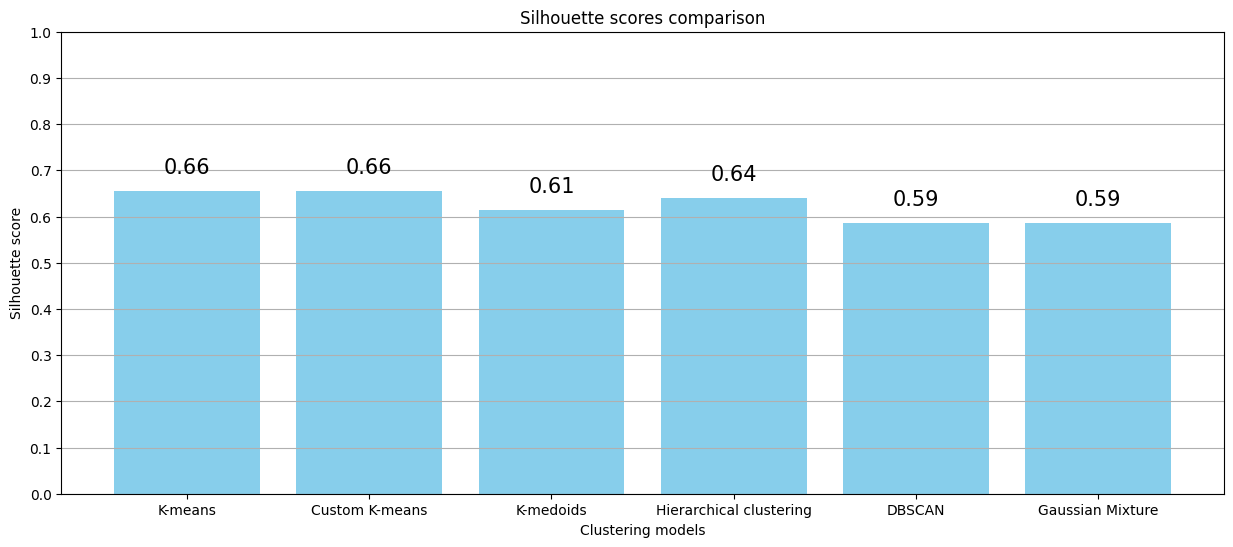

In [131]:
plt.figure(figsize=(15, 6))
bars = plt.bar(models.keys(), [model["Silhouette score"] for model in models.values()], color='skyblue')
plt.title('Silhouette scores comparison')
plt.xlabel('Clustering models')
plt.ylabel('Silhouette score')
plt.ylim(0, 1)
plt.yticks(numpy.arange(0, 1.1, 0.1))
plt.grid(axis='y')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 10), 
                 textcoords="offset points", ha='center', va='bottom', fontsize=15)
plt.show()

Los resultados generales obtenidos con todos los modelos de *clustering* probados son buenos, un índice de Silhouette de >~0.6. D entre ellos destacan el K-means, tanto el proporcionado por `sklearn` como el personalizado, los cuales son idénticos en cuanto a comportamiento.

Sin emabrgo, **se va a utilizar como modelo final el K-medoids** por ser más explicable a pesar de tener ligeramente peor índice de Silhouette.

---

The overall results obtained with all the clustering models tested are good, with a Silhouette score of >~0.6. Among them, K-means stands out, both the one provided by `sklearn` and the customized one, which behave identically.

However, **the final model to be used will be K-medoids** because it is more explainable despite having a slightly lower Silhouette score.

In [132]:
final_model = models["K-medoids"]["Model"]

### One-Hot-Encoding

Una vez elegido el modelo final empleando la codificación de los atributos `Color` y `Spectral_Class` como variables ordinales. Se prueba realizar una codificación *one-hot-encoding* sobre el modelo final elegido con *ordinal feature encoding*.

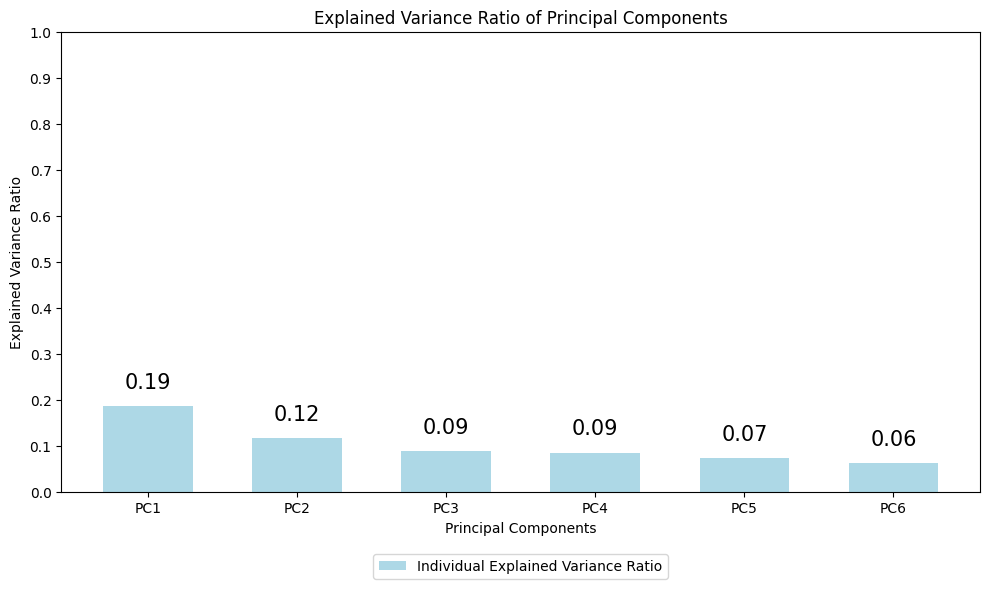

In [133]:
# Encoding
color_one_hot_encoded = pandas.get_dummies(data['Color'], prefix='Color')
spectral_class_one_hot_encoded = pandas.get_dummies(data['Spectral_Class'], prefix='Spectral_Class')
data_one_hot_encoded = pandas.concat([data.drop(['Color', 'Spectral_Class'], axis=1), color_one_hot_encoded, spectral_class_one_hot_encoded], axis=1)

# Scaling
data_scaled_one_hot_encoded = scale(X=data_one_hot_encoded, axis=0, with_mean=True, with_std=True)

# PCA
pca = PCA(n_components=data_scaled.shape[1])
X_one_hot_encoded = pca.fit_transform(data_scaled_one_hot_encoded)
plot_pca(pca)

Se puede ver que empleando *one-hot-encoding* los dos mejores componentes, PC1 y PC2, explican nada más que el 30% de la varianza frente al 85% con *ordinal feature encoding*. Esto se debe a que existe un orden inerente en el conjunto de datos para `Color` y `Spectral_Class` que debe respetarse.

---

Using one-hot-encoding, it can be seen that the two best components, PC1 and PC2, explain only 30% of the variance compared to 85% with ordinal feature encoding. This is because there is an inherent order in the dataset for `Color` and `Spectral_Class` that must be respected.

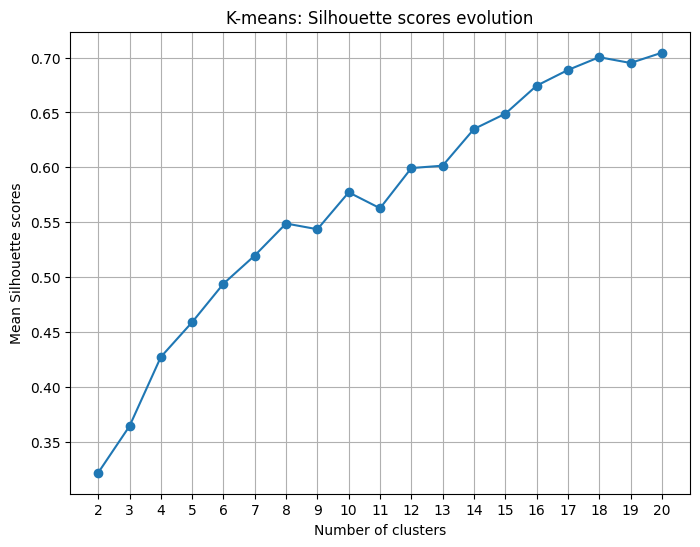

In [134]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

RANGE_N_CLUSTERS = range(2, 21)
silhouette_avgs = []

for n_clusters in RANGE_N_CLUSTERS:
    model = KMeans(n_clusters=n_clusters, n_init=BUDGET, random_state=SEED)
    silhouette_avgs.append(silhouette_score(data_scaled_one_hot_encoded, model.fit_predict(data_scaled_one_hot_encoded)))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(RANGE_N_CLUSTERS, silhouette_avgs, marker='o')
ax.set_title("K-means: Silhouette scores evolution")
ax.set_xticks(range(2, 21, 1))
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Mean Silhouette scores')
ax.grid(True)
plt.show()

La evolución de los índices de Silhouette, sin utilizar PCA y quedandonos con los datos en el paso de escalado, nos indica que con 6 *clusters* se obtiene un índice de Silhouette por debajo de 0.5, un valor relativamente bastante peor que el obtenido con el modelo final.

---

The evolution of the Silhouette scores, without using PCA and keeping the data after scaling, indicates that with 6 clusters, a Silhouette score below 0.5 is obtained, a relatively worse value compared to the one obtained with the final model.

### Pipeline

A continuación se resume el *pipeline* recomendado:

1. Unificar los valores de `Color`.

2. Codificar los datos empleando *ordinal feature encoding*.

3. Escalar los datos para que tengan media 0 y deviación típica 1.

4. Reducir la dimnesionalidad de los datos empleando PCA con 2 componentes.

5. Utilizar K-medoids con 6 *clusters* y con el método `pam` para mejorar los resultados.

---

Below is a summary of the recommended pipeline:

1. Unify the values of `Color`.

2. Encode the data using ordinal feature encoding.

3. Scale the data to have a mean of 0 and a standard deviation of 1.

4. Reduce the dimensionality of the data using PCA with 2 components.

5. Use K-medoids with 6 clusters and the `pam` method to improve the results.

### Cluster profilling

Finalmente se estudia con más detalle cada uno de los *clusters* con el objetivo de conocer los valores de los atributos de los datos que los caracterizan como parte de su clase.

---

Finally, each of the clusters is studied in more detail with the aim of understanding the attribute values of the data that characterize them as part of their class.

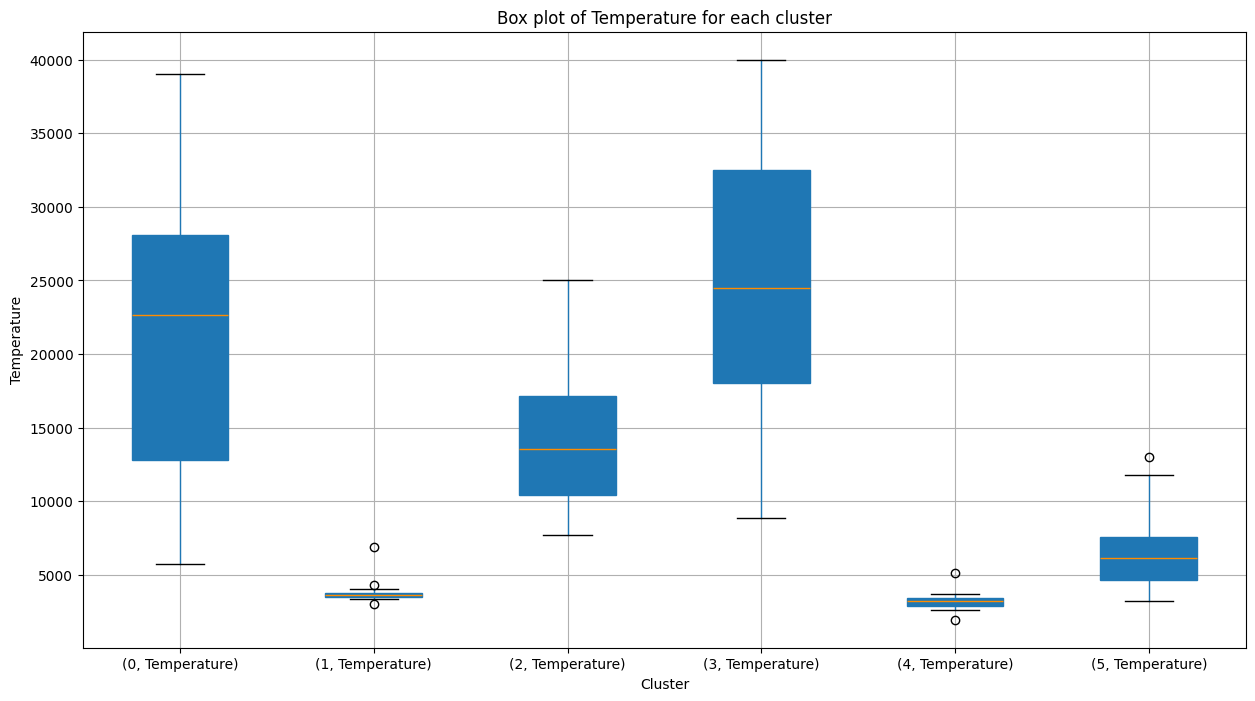

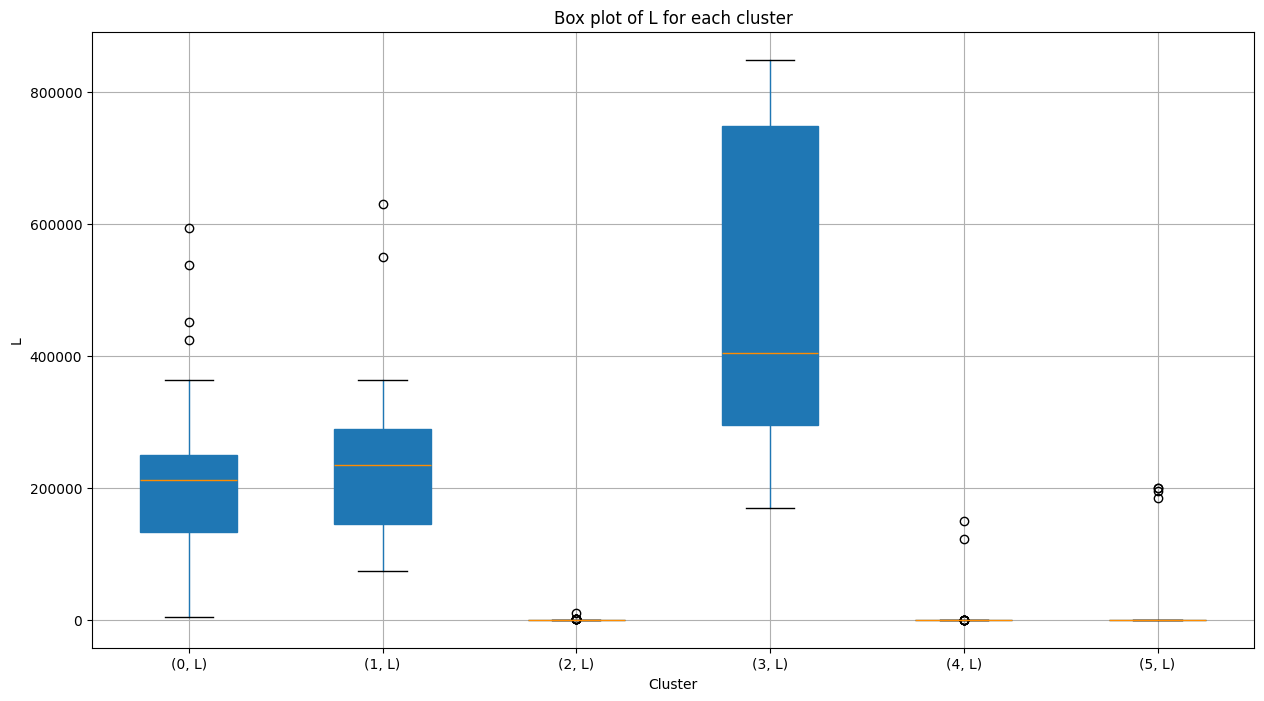

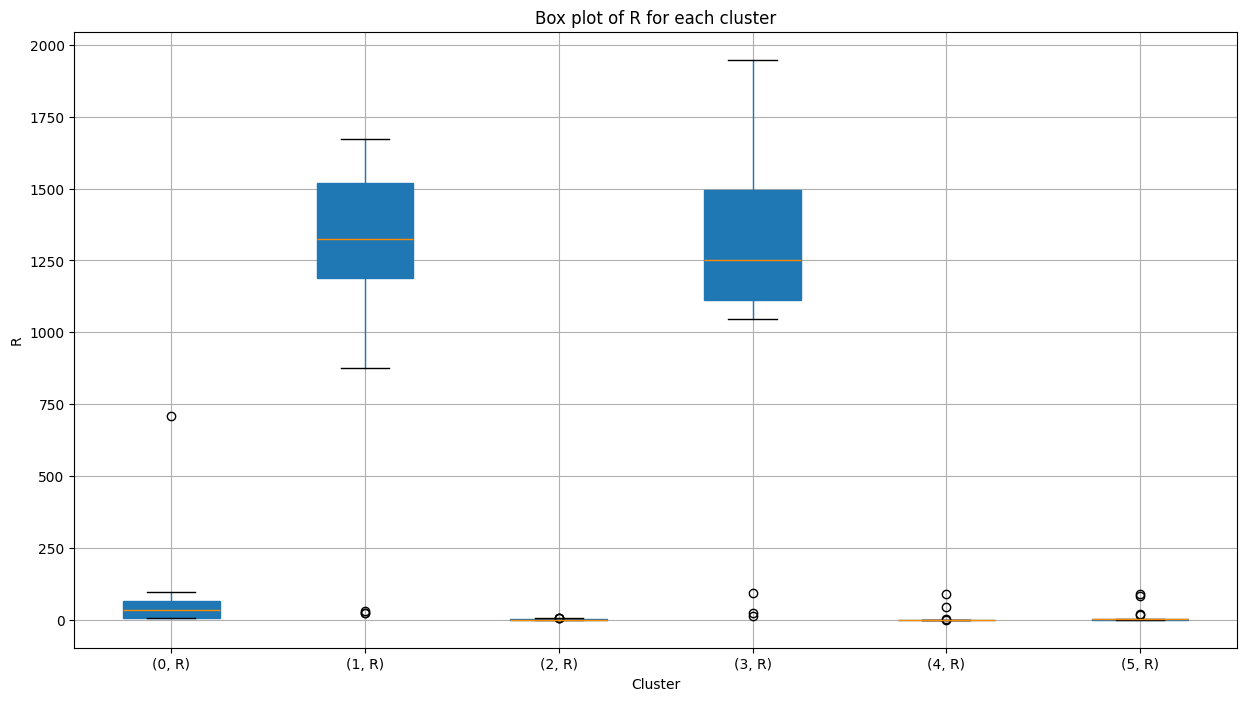

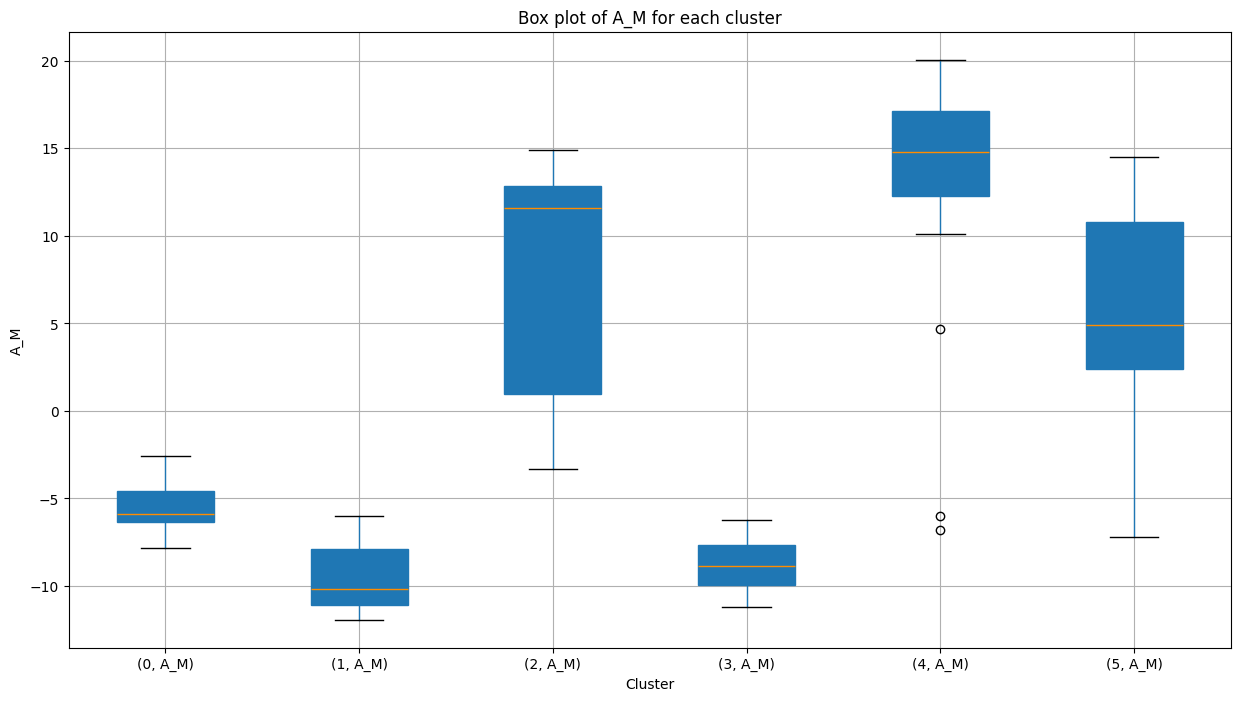

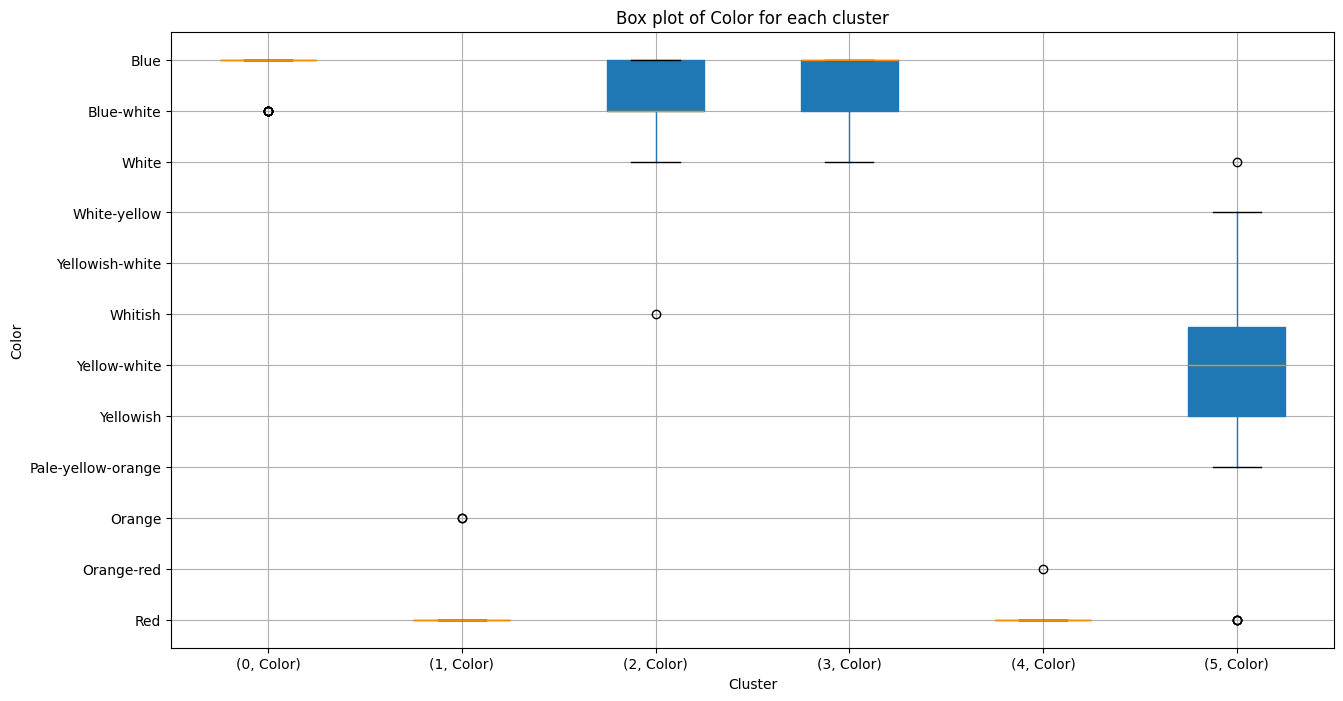

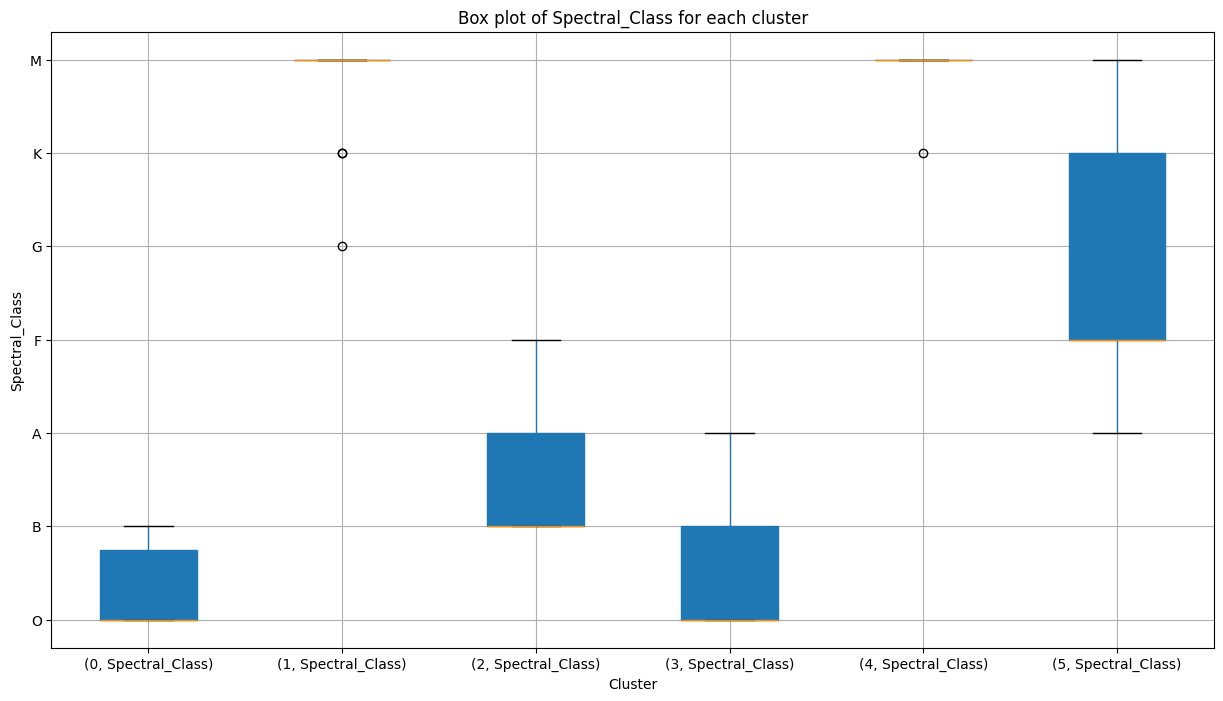

In [135]:
cluster_labels = final_model.predict(X)

# Add cluster labels to your original data
data_ordinal['Cluster'] = cluster_labels

# Group data by cluster labels
grouped_data = data_ordinal.groupby('Cluster')

# Plot box plots for each attribute
for attribute in data.columns:
    plt.figure(figsize=(15, 8))
    grouped_data.boxplot(column=attribute, subplots=False, patch_artist=True, medianprops=dict(color="darkorange"))
    plt.title(f'Box plot of {attribute} for each cluster')
    plt.xlabel('Cluster')
    if attribute == 'Color':
        plt.yticks(range(len(color_order)), color_order)
    if attribute == 'Spectral_Class':
        plt.yticks(range(len(spectral_class_order)), spectral_class_order)
    plt.ylabel(attribute)
    plt.show()

Observando los *boxplots* se pueden ver similitudes y diferencias entre los *clusters* del modelo de *clustering* entrenado y las clases definidas por los científicos en el enunciado de la práctica.

**`Temperature`**:

- Se obtienen 2 *clusters* con temperaturas bajas y 4 *clusters* con temperaturas altas.
- Las temperaturas bajas de los *clusters* 1 y 4 son de 3000 K y posiblemente se corresponden a las `enanas rojas` y `enanas marrones`.
- Los *clusters* 0 y 3 posiblemente se correspondan a las `hipergigantes` y `supergigantes`, las cuales pueden presentar temperaturas extremadamente altas dependiendo de la fase en la que se encuentren. Observando el *scatter plot*, las temperaturas bajas se corresponden a los *clusters* arriba-izquierda mientras que las temperaturas altas se corresponden a los *clusters* abajo-derecha.

**`L`**:

- Hay 3 *clusters* con valores altos de luminosidad y 3 con valores muy bajos a los de nuestro Sol.
- Los *clusters* 2, 4 y 5 posiblemente se corresponden a `enanas rojas`, `enanas marrones` y `enanas blancas`.
- Los valores tan altos del *cluster* 3 se pueden explicar si se corresponde a las `hipergigantes`, las estrellas más luminosas. Esta última afirmación parece respaldarla la existencia de correlación entre `Temperature` y `L`.

**`R`**:

- Hay 3 clusters con radios muy grandes, 1 cercano a nuestro Sol y otros 2 muy bajos.
- El *cluster* 0 con radios similares a los del Sol parece corresponderse con las `estrellas en secuencia principal`. Este también tiene temperaturas y luminosidades altas.
- Los radios bajos de los *clusters* 2, 4 y 5 posiblemente se corresponden a `enanas rojas`, `enanas marrones` y `enanas blancas`, al igual que se veía con la luminosidad.
- Los *clusters* 1 y 3 podrían corresponderse a las `supergigantes` y a las `hipergigantes`, pero aquí es donde comenzamos a ver diferencias. Si afirmamos que las `supergigantes` son el *cluster* 1, entonces se afirma que estas estrellas poseen temperaturas muy bajas cuando es al revés.

**`A_M`**:

- Se obtienen 3 *clusters* con magnitud absoluta negativa y 3 con positiva.
- Los *clusters* 0, 1 y 3 se podrían corresponder a las `estrellas en secuencia principal`, `super gigantes` y las `hipergigantes`.
- Los *clusters* 2, 4 y 5 se podrían corresponder a las `enanas rojas`, `enanas marrones` y `enanas blancas`. Aquí ocurre otro conflicto, puesto que asignaríamos a una de las estrellas enanas el *cluster* 2 que posee temperaturas altas.

**`Color`**:

- Hay estrellas que tienden al color azul, otras al rojo y un grupo entre medias con blanco y amarillo.
- Los *clusters* 0, 2 y 3 se pueden corresponder con las `enanas blancas`, `estrellas en secuencia principal` y `supergigantes`.
- Los *clusters* 1 y 4 a `enanas rojas` y `enanas marrones`.
- El *cluster* 5 a las `hipergigantes`.

**`Spectral_Class`**:

- Se diferencian las estrellas con clase espectral cercana a B, cercana a M y entre medias.
- Los *clusters* 0, 2 y 3 pueden ser `estrellas en secuencia principal`, `supergigantes` y `hipergigantes`.
- Los *clusters* 1 y 4 a `enanas rojas` y `enanas marrones`.
- El *cluster* 5 a `enanas blancas`.

En general, el perfil de cada cluster por cada atributo parece claro. Sin embargo, hay discrepancias cuando se junta la información de todos los atributos de un *cluster*. Para resolver esos conflictos hemos tomado un orden de precedencia, primero se ajustan los atributos `Temperature` y `Color` por ser quienes más aportan a la creación de los componentes PCA y luego el resto de atributos. De forma que:

- ***Cluster* 0**: corresponde a las **supergigantes**.

- ***Cluster* 1**: corresponde a las **enanas marrones**.

- ***Cluster* 2**: corresponde a las **enanas blancas**.

- ***Cluster* 3**: corresponde a las **hipergigantes**.

- ***Cluster* 4**: corresponde a las **enanas rojas**.

- ***Cluster* 5**: corresponde a las **estrellas en secuencia principal**.

---

Looking at the boxplots, we can see similarities and differences between the clusters of the trained clustering model and the classes defined by scientists in the practice statement.

**`Temperature`**:

- There are 2 clusters with low temperatures and 4 clusters with high temperatures.
- The low temperatures of clusters 1 and 4 are around 3000 K and possibly correspond to `red dwarfs` and `brown dwarfs`.
- Clusters 0 and 3 possibly correspond to `hypergiants` and `supergiants`, which can have extremely high temperatures depending on their phase. Observing the scatter plot, low temperatures correspond to clusters in the top-left, while high temperatures correspond to clusters in the bottom-right.

**`Luminosity (L)`**:

- There are 3 clusters with high luminosity values and 3 with values much lower than our Sun's.
- Clusters 2, 4, and 5 possibly correspond to `red dwarfs`, `brown dwarfs`, and `white dwarfs`.
- The very high values in cluster 3 can be explained if it corresponds to `hypergiants`, the most luminous stars. This claim seems supported by the existence of a correlation between `Temperature` and `L`.

**`Radius (R)`**:

- There are 3 clusters with very large radii, 1 close to our Sun's, and 2 very low.
- Cluster 0, with radii similar to the Sun's, seems to correspond to `main sequence stars`. It also has high temperatures and luminosities.
- The low radii of clusters 2, 4, and 5 possibly correspond to `red dwarfs`, `brown dwarfs`, and `white dwarfs`, similarly to what was observed with luminosity.
- Clusters 1 and 3 could correspond to `supergiants` and `hypergiants`, but here is where we start to see differences. If we claim that `supergiants` are cluster 1, then we claim that these stars have very low temperatures, which is the opposite.

**`Absolute Magnitude (A_M)`**:

- There are 3 clusters with negative absolute magnitude and 3 with positive.
- Clusters 0, 1, and 3 could correspond to `main sequence stars`, `supergiants`, and `hypergiants`.
- Clusters 2, 4, and 5 could correspond to `red dwarfs`, `brown dwarfs`, and `white dwarfs`. Here another conflict arises, as we assign one of the dwarf stars to cluster 2, which has high temperatures.

**`Color`**:

- There are stars tending towards blue, others towards red, and a group in between with white and yellow.
- Clusters 0, 2, and 3 may correspond to `white dwarfs`, `main sequence stars`, and `supergiants`.
- Clusters 1 and 4 to `red dwarfs` and `brown dwarfs`.
- Cluster 5 to `hypergiants`.

**`Spectral Class`**:

- Stars with spectral class close to B, close to M, and in between are differentiated.
- Clusters 0, 2, and 3 could be `main sequence stars`, `supergiants`, and `hypergiants`.
- Clusters 1 and 4 to `red dwarfs` and `brown dwarfs`.
- Cluster 5 to `white dwarfs`.

In general, the profile of each cluster for each attribute seems clear. However, there are discrepancies when all the attribute information of a cluster is combined. To resolve these conflicts, we have taken a precedence order, first adjusting the `Temperature` and `Color` attributes as they contribute the most to the creation of PCA components, and then the rest of the attributes. So:

- **Cluster 0**: corresponds to **supergiants**.

- **Cluster 1**: corresponds to **brown dwarfs**.

- **Cluster 2**: corresponds to **white dwarfs**.

- **Cluster 3**: corresponds to **hypergiants**.

- **Cluster 4**: corresponds to **red dwarfs**.

- **Cluster 5**: corresponds to **main sequence stars**.